In [1315]:
## LIBRARY AND DATA LOADING
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import math
import csv
from datetime import datetime

#Model Building Libraries
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict, cross_val_score

# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode() # run at the start of every notebook

# Setup matplotlib to display in notebook:
%matplotlib inline

py.sign_in('mariapichardo', 'efxdg3vty3') # CREDENTIALS FOR PLOT.LY

from psycopg2 import connect
import sys
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
plt.style.use('fivethirtyeight')

from collections import Counter
from __future__ import division
from matplotlib.ticker import AutoMinorLocator, FixedLocator
from sklearn.preprocessing import LabelEncoder

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Articulate “Specific aim”


The aim of this captone project is to determinte which factors have more incidence in the breast cancer diagnosis after a regular mamogram. At the same time I will build a model to predict the  probability of breast cancer based on those factors. I will be also creating an interface to predict the probability of breast cancer after entering the factors using the model.

#### Background 

According to the American Cancer Society statistics 2016,  it is estimated that almost 1.7 million new cases of cancer will be diagnosed in 2016. Prostate cancer is the most common cancer among males (21%), followed by lung (14%) and colorectal (8%) cancers. Among females, breast (29%), lung (13%), and colorectal (8%) cancers are the most common

![alt tag](Capstone_3.png)

#### Risk Estimation Data Set Information

Overview

This dataset includes 2,392,998 screening mammograms (called the "index mammogram") from women included in the Breast Cancer Surveillance Consortium (BCSC) and results were published by Barlow et al. in the September 2006 issue of the Journal of the National Cancer Institute. The women in this dataset did not have a previous diagnosis of breast cancer and did not have any breast imaging in the nine months preceding the index screening mammogram. However, all women had undergone previous breast mammography in the prior five years (though not in the last nine months). Cancer registry and pathology data were linked to the mammography data and incident breast cancer (invasive or ductal carcinoma in situ) within one year following the index screening mammogram was assessed.  There is one observation per woman, as opposed to multiple observations. All population and all other characteristics remain the same.

This dataset has 9 years of data from 2000 to 2009

## Outline proposed methods and models

My current plan is to build a Logistic Regression model. Will also run cross validation and created other models for comparison in performance, accuracy and feature importance. 

<h3>Model</h3>

<p>I compared the classifiers below. It may seem like a lot, but the purpose was to select the best classifier based on mse and std.</p>

![alt tag](model_comparison.png)

<p>I trained and tested on a hold-out sample (20% of the dataset). </p>

<p>Each model used the following features from the data: </p>

<p>Features:</p>

<ul>

<li>age_menarche - Age (years) at menarche</li>
<li>age_group_5_years - Age (years) in 5 year groups</li>
<li>race_eth - Race/ethnicity</li>
<li>first_degree_hx - History of breast cancer in a first degree relative</li>
<li>breast_cancer_history - Prior breast cancer diagnosis</li>
<li>age_first_birth - Age (years) at first birth</li>
<li>current_hrt - Use of hormone replacement therapy</li>
<li>menopaus - Menopausal status</li>
<li>bmi_group - Body mass index</li>


</ul>

<p>Target:</p> 
<p>Results based on BI-RADS breast density: </p>

<ul>
<li>0 - Negative  - Low risk </li>
<li>1 - Positive  - High Risk</li>
</ul>

## Define risks & assumptions

<p>The risk of modeling is always to be able to obtain accurate relative results from predicting based on factors, such as demographics, reproductive history,  medications, genetic factors (e.g., family history and susceptibility genes), and clinical and biologic markers (e.g., blood pressure, cholesterol, enzyme levels, and histologic markers). How these factors act jointly on risk also is important. These relative risk and attributable risk estimates, as well as missing or biased data has to be taken into account when reviewing the results of the present study</p>

<cr> <cr> <cr>

<font color="red"> </font>  

## Describe data cleaning/munging techniques
<h3> <font color="red">   Given the amount of records on this dataset, I have created a local PostgreSQL DB to be able to manipulate the data and create tables and small DF(s) for EDA and plotting </font>  </h3>
<font color="red">   You can find the Data Dictionary and EDA below </font>  

<h3>Results and Conclusion</h3>

<p>I have developed a prognostication model for early breast cancer based The Breast Cancer Surveillance Consortiumon (BCSC) index mammogram dataset. The model predicts breast cancer probability after a mamogram is done. The probability is based on BI-RADS breast density which is part of the dataset. The performance and score have been compare among several classifiers. The best performer was GridsearchCV  Bagging Logistic Regression. I picked the Logistic refression because of its simplicity</p>

<p>Being able to predict breast  cancer outcomes more accurately would help physicians make informed decisions regarding the potential necessity of research and treatment in women patients </p>

<h3>Next Steps</h3>

<p>The model needs to be better calibrated  with more data, and also validated with and evaluated by professionals in the area </p>
<p>It would be benefitial to research the BCSC dataset bank and more features to improve score  </p>

<h3>Additional Links</h3>

<a href="http://www.bcsc-research.org/data/index.html"> 
<font color="1dcaff"> BCSC DATA</font> </a>

<a href="https://docs.google.com/presentation/d/19jJ3cA-yrd4_Mm-yO0AL9Uz74FbkJZmwq9i4TR2UrxY/edit#slide=id.p"> 
<font color="1dcaff"> Link to the Google Slide Presentation Factors that have more incidence in the breast cancer diagnosis after a regular mamogram</font> </a>

## Created local Postgres DataBase cancer_data

In [9]:
#%load_ext sql
# connecting to local host 
con = connect(user='mariapichardo', host='localhost')
con.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
cur = con.cursor()
# creating database in SQL server 
cur.execute('create Database cancer_data;')
# if you want to drop the database uncomment statement below
#cur.execute('drop Database airport;')

ProgrammingError: database "cancer_data" already exists


In [2]:
## Function to Replace a value in dataframe columns 
def replace_colname(value, repl, df):
    df.columns= [i.replace(value, repl) if value in i else i for i in df.columns.values]



In [3]:
#list of replacement tuples to rename columns and facilite sql statements 

replace_list = [(" ", "_"), ("-", "_"), ("/", "_"), ("<", "lt"), (">", "gt"), ("(", ""), (")", ""),\
                ("__", "_"), ("#", "no"), ("+", "plus")]


In [4]:
%load_ext sql

In [5]:
# connect to postgres database 
%sql postgresql://mariapichardo@localhost:5432/cancer_data

u'Connected: mariapichardo@cancer_data'

## Data Dictionary

<table class="data-table data-left">
  <tr>
    <th scope="col"><strong>Variable Name</strong></th>
    <th scope="col"><strong>Description </strong></th>
    <th scope="col"><strong>Coding</strong></th>
  </tr>
  <tr>
    <td>year</td>
    <td>Calendar year of observation</td>
    <td>Numerical, 2000-2009</td>
  </tr>
  <tr>
    <td>age_group_5_years</td>
    <td>Age (years) in 5 year groups</td>
    <td><ul>
  <li>1 = Age 18-29</li>
  <li>2 = Age 30-34</li>
  <li>3 = Age 35-39</li>
  <li>4 = Age 40-44</li>
  <li>5 = Age 45-49</li>
  <li>6 = Age 50-54</li>
  <li>7 = Age 55-59</li>
  <li>8 = Age 60-64</li>
  <li>9 = Age 65-69</li>
  <li>10 = Age 70-74</li>
  <li>11 = Age 75-79</li>
  <li>12 = Age 80-84</li>
  <li>13 = Age &gt;85</li>
</ul></td>
  </tr>
  <tr>
    <td>race_eth</td>
    <td>Race/ethnicity</td>
    <td><ul>
  <li>1 =    Non-Hispanic white</li>
  <li>2 = Non-Hispanic black</li>
  <li>3 = Asian/Pacific Islander</li>
  <li>4 =    Native      American</li>
  <li>5 = Hispanic</li>
  <li>6 = Other/mixed</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>first_degree_hx</td>
    <td>History of breast cancer in a first degree relative</td>
    <td><ul>
  <li>0 = No</li>
  <li>1 = Yes</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>age_menarche</td>
    <td>Age (years) at menarche</td>
    <td><ul>
  <li>0 = Age &gt;14</li>
  <li>1 = Age 12-13</li>
  <li>2 = Age &lt;12</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>age_first_birth</td>
    <td>Age (years) at first birth</td>
    <td><ul>
  <li>0 = Age &lt; 20</li>
  <li>1 = Age 20-24</li>
  <li>2 = Age 25-29</li>
  <li>3 = Age    &gt;30</li>
  <li>4 = Nulliparous</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>BIRADS_breast_density</td>
    <td>BI-RADS breast density</td>
    <td><ul>
  <li>1 =    Almost entirely fat</li>
  <li>2 =      Scattered    fibroglandular densities</li>
  <li>3 = Heterogeneously      dense</li>
  <li>4 = Extremely dense</li>
  <li>9 = Unknown or different      measurement system</li>
</ul></td>
  </tr>
  <tr>
    <td>current_hrt</td>
    <td>Use of hormone replacement therapy</td>
    <td><ul>
  <li>0 = No</li>
  <li>1 = Yes</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>menopaus</td>
    <td>Menopausal status</td>
    <td><ul>
  <li>1 = Pre- or peri-menopausal</li>
  <li>2 = Post-menopausal</li>
  <li>3 =    Surgical menopause</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>bmi_group</td>
    <td>Body mass index</td>
    <td><ul>
  <li>1 = 10-24.99</li>
  <li>2 = 25-29.99</li>
  <li>3 = 30-34.99</li>
  <li>4 = 35 or more</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>biophx</td>
    <td>Previous breast biopsy or aspiration</td>
    <td><ul>
  <li>0 = No</li>
  <li>1 = Yes</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>breast_cancer_history</td>
    <td>Prior breast cancer diagnosis</td>
    <td><ul>
  <li>0 = No</li>
  <li>1 = Yes</li>
  <li>9 = Unknown</li>
</ul></td>
  </tr>
  <tr>
    <td>count</td>
    <td>Frequency count of this combination of covariates</td>
    <td>Numerical</td>
  </tr>
</table>



In [6]:
## Load breast data from Breast Cancer Surveillance Consortium (BCSC) file 
# BCSC_risk_factors_summarized.csv

risk_data = pd.read_csv('BCSC_risk_factors_summarized.csv')


In [7]:
risk_data.tail(5)

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,BIRADS_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count
1144559,2009,13,9,9,9,9,9,9,2,2,1,1,1
1144560,2009,13,9,9,9,9,9,9,2,9,0,9,2
1144561,2009,13,9,9,9,9,9,9,2,9,1,0,1
1144562,2009,13,9,9,9,9,9,9,2,9,9,0,7
1144563,2009,13,9,9,9,9,9,9,2,9,9,9,3


In [8]:
len(risk_data)

1144564

#### Set column names to lower case to facilitate sql statements - If it is all lowwer case you don't have to enclose column name in quotes

In [9]:
# set column names to lower case to facilitate sql statements
risk_data.columns = [i.lower() for i in risk_data.columns.values]

#### Eliminate spaces and special characters from column name

In [1317]:
for i, n in replace_list:
    replace_colname(i, n, risk_data)

In [11]:
# Create result column
# BI-RADS assessments 1, 2, and 3 are negative; 
# 4 and 5 are positive. Typically, 
# unique for  BIRADS_breast_density [1 3 4 9 2] 5
def result(z):
    if z in (1,2,9):
        return "Negative"
    elif z in (3,4):
        return "Positive"

In [12]:
# Create same result column as above biy in BYNARY for modelling
# BI-RADS assessments 1, 2, and 3 are negative; 
# 4 and 5 are positive. Typically, 
# unique for  BIRADS_breast_density [1 3 4 9 2] 5
def result_binary(z):
    if z in (1,2,9):
        return 0 
    elif z in (3,4):
        return 1

In [13]:
risk_data['results'] = risk_data['birads_breast_density'].apply(lambda x: result(x))

In [14]:
risk_data['results_bin'] = risk_data['birads_breast_density'].apply(lambda x: result_binary(x))

## Converting  df to sql tables 
## The table is already there uncomment if you need to re-create

In [48]:
# risk_data.to_sql('risk_data', engine, if_exists='replace')

#### Start EDA

In [15]:
%%sql
SELECT  * FROM  risk_data LIMIT 3;

3 rows affected.


index,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
0,2000,1,1,0,0,0,1,0,1,3,0,0,1,Negative,0
1,2000,1,1,0,0,1,3,0,1,2,0,0,1,Positive,1
2,2000,1,1,0,0,1,4,0,1,1,0,0,2,Positive,1


In [16]:
%%sql
SELECT  * FROM  risk_data
where birads_breast_density in (3,4)
and results_bin = 0;

0 rows affected.


index,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin


In [17]:
%%sql
SELECT  * FROM  risk_data
where birads_breast_density in (1,2,9)
and results_bin = 1;

0 rows affected.


index,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin


In [18]:
%%sql
SELECT  * FROM  risk_data
where birads_breast_density not in (1,2,9,3,4);

0 rows affected.


index,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin


In [19]:
%%sql
SELECT  birads_breast_density, count(*) FROM  risk_data
group by  birads_breast_density;

5 rows affected.


birads_breast_density,count
4,107658
1,132881
9,253767
2,332749
3,317509


In [19]:
risk_data.columns

Index([u'year', u'age_group_5_years', u'race_eth', u'first_degree_hx',
       u'age_menarche', u'age_first_birth', u'birads_breast_density',
       u'current_hrt', u'menopaus', u'bmi_group', u'biophx',
       u'breast_cancer_history', u'count', u'results', u'results_bin'],
      dtype='object')

### Assessment categories in the BI-RADS manual:
### • 0 indicates that additional imaging evaluation is needed (i.e., incomplete assessment)
### • 1-5 indicate the level of suspicion for malignancy
### 1: negative
### 2: benign finding
### 3: probably benign finding
### 4: suspicious abnormality
### 5: highly suggestive of malignancy
### • 6 indicates a known biopsy-proven malignancy

### THE "6" ARE NOT PART OF THIS DATASET



In [1311]:
# print column_name and UNIQUE VALUES 
for column_name in risk_data.columns:
    if column_name <> 'count':
        print 'unique for ',  column_name, risk_data[column_name].unique(), risk_data[column_name].nunique()

unique for  year [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009] 10
unique for  age_group_5_years [ 1  2  3  4  5  6  7  8  9 10 11 12 13] 13
unique for  race_eth [1 2 3 4 5 6 9] 7
unique for  first_degree_hx [0 1 9] 3
unique for  age_menarche [0 1 2 9] 4
unique for  age_first_birth [0 1 2 4 9 3] 6
unique for  birads_breast_density [1 3 4 9 2] 5
unique for  current_hrt [0 9 1] 3
unique for  menopaus [1 2 9 3] 4
unique for  bmi_group [3 2 1 9 4] 5
unique for  biophx [0 1 9] 3
unique for  breast_cancer_history [0 9 1] 3
unique for  results ['Negative' 'Positive'] 2
unique for  results_bin [0 1] 2


### Start checking correlation

In [242]:
corr = risk_data.corr()

In [243]:
corr

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results_bin
year,1.000000,0.024333,-0.013249,-0.057322,-0.073852,0.013091,-0.014426,0.022438,-0.001875,0.018693,0.042757,-0.063167,-0.010043,-0.004764
age_group_5_years,0.024333,1.000000,-0.029117,-0.066869,-0.024573,-0.143960,-0.033629,0.042396,-0.199817,0.084031,0.019713,0.006166,-0.011767,-0.112547
race_eth,-0.013249,-0.029117,1.000000,0.023991,0.183166,0.106198,0.005664,-0.048134,0.039976,0.198773,0.009446,0.000332,-0.010077,-0.012760
first_degree_hx,-0.057322,-0.066869,0.023991,1.000000,0.104483,0.093655,0.073193,0.110802,0.069229,0.071208,0.007614,0.129367,0.010317,-0.015577
age_menarche,-0.073852,-0.024573,0.183166,0.104483,1.000000,0.280699,0.164977,0.038014,0.067157,0.114243,0.025573,0.084960,0.063916,-0.096525
age_first_birth,0.013091,-0.143960,0.106198,0.093655,0.280699,1.000000,0.077031,0.088813,0.125022,0.147752,0.066258,0.122175,0.074558,0.003755
birads_breast_density,-0.014426,-0.033629,0.005664,0.073193,0.164977,0.077031,1.000000,0.065269,0.017091,0.033964,0.023473,0.004743,0.014252,-0.175985
current_hrt,0.022438,0.042396,-0.048134,0.110802,0.038014,0.088813,0.065269,1.000000,0.154592,0.127116,0.156365,0.317287,-0.020345,-0.010703
menopaus,-0.001875,-0.199817,0.039976,0.069229,0.067157,0.125022,0.017091,0.154592,1.000000,0.086882,0.076054,0.127186,0.009284,0.012088
bmi_group,0.018693,0.084031,0.198773,0.071208,0.114243,0.147752,0.033964,0.127116,0.086882,1.000000,0.115939,0.119543,0.052605,-0.064645


#### Factors that seem to be important That I can see in this table and also after reading reseacrh documents in the topic:

- Age
- Race/ethnicity
- Family history of breast cancer in a first-degree relative (mother, sister or daughter)
- History of a breast biopsy (core biopsy, excisional biopsy or fine-needle aspiration) with benign breast disease diagnoses if known
- BI-RADS® breast density (radiologic assessment of the density of breast tissue by a radiologist who interprets mammograms)

In [1313]:
# MY TARGET SEEMS TO BE birads_breast_density CHECK CORRELATION WITH THE REST

corr['birads_breast_density'].sort_values( ascending = False).T

birads_breast_density    1.000000
age_menarche             0.164977
age_first_birth          0.077031
first_degree_hx          0.073193
current_hrt              0.065269
bmi_group                0.033964
biophx                   0.023473
menopaus                 0.017091
count                    0.014252
race_eth                 0.005664
breast_cancer_history    0.004743
year                    -0.014426
age_group_5_years       -0.033629
results_bin             -0.175985
Name: birads_breast_density, dtype: float64

In [1314]:
# DESCRIPTIVE OVERVIEW OF THE DATASET
risk_data.describe()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results_bin
count,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06,1.144564e+06
mean,2.004375e+03,7.120509e+00,2.661840e+00,8.312414e-01,4.378768e+00,3.988439e+00,3.901434e+00,2.449505e+00,2.681833e+00,4.240732e+00,8.952308e-01,1.850951e+00,5.520563e+00,3.714663e-01
std,2.841177e+00,2.672426e+00,2.363549e+00,2.152390e+00,3.985370e+00,3.415460e+00,2.831666e+00,3.843906e+00,2.366681e+00,3.315587e+00,2.047729e+00,3.498102e+00,4.128115e+01,4.831970e-01
min,2.000000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.002000e+03,5.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.004000e+03,7.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.007000e+03,9.000000e+00,5.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,4.000000e+00,9.000000e+00,2.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00
max,2.009000e+03,1.300000e+01,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,9.000000e+00,8.771000e+03,1.000000e+00


In [25]:
risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144564 entries, 0 to 1144563
Data columns (total 15 columns):
year                     1144564 non-null int64
age_group_5_years        1144564 non-null int64
race_eth                 1144564 non-null int64
first_degree_hx          1144564 non-null int64
age_menarche             1144564 non-null int64
age_first_birth          1144564 non-null int64
birads_breast_density    1144564 non-null int64
current_hrt              1144564 non-null int64
menopaus                 1144564 non-null int64
bmi_group                1144564 non-null int64
biophx                   1144564 non-null int64
breast_cancer_history    1144564 non-null int64
count                    1144564 non-null int64
results                  1144564 non-null object
results_bin              1144564 non-null int64
dtypes: int64(14), object(1)
memory usage: 131.0+ MB


In [26]:
risk_data[risk_data['year'].isin([2000, 2001])].head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
0,2000,1,1,0,0,0,1,0,1,3,0,0,1,Negative,0
1,2000,1,1,0,0,1,3,0,1,2,0,0,1,Positive,1
2,2000,1,1,0,0,1,4,0,1,1,0,0,2,Positive,1
3,2000,1,1,0,0,2,3,0,1,1,0,0,1,Positive,1
4,2000,1,1,0,0,2,3,0,1,1,1,9,1,Positive,1


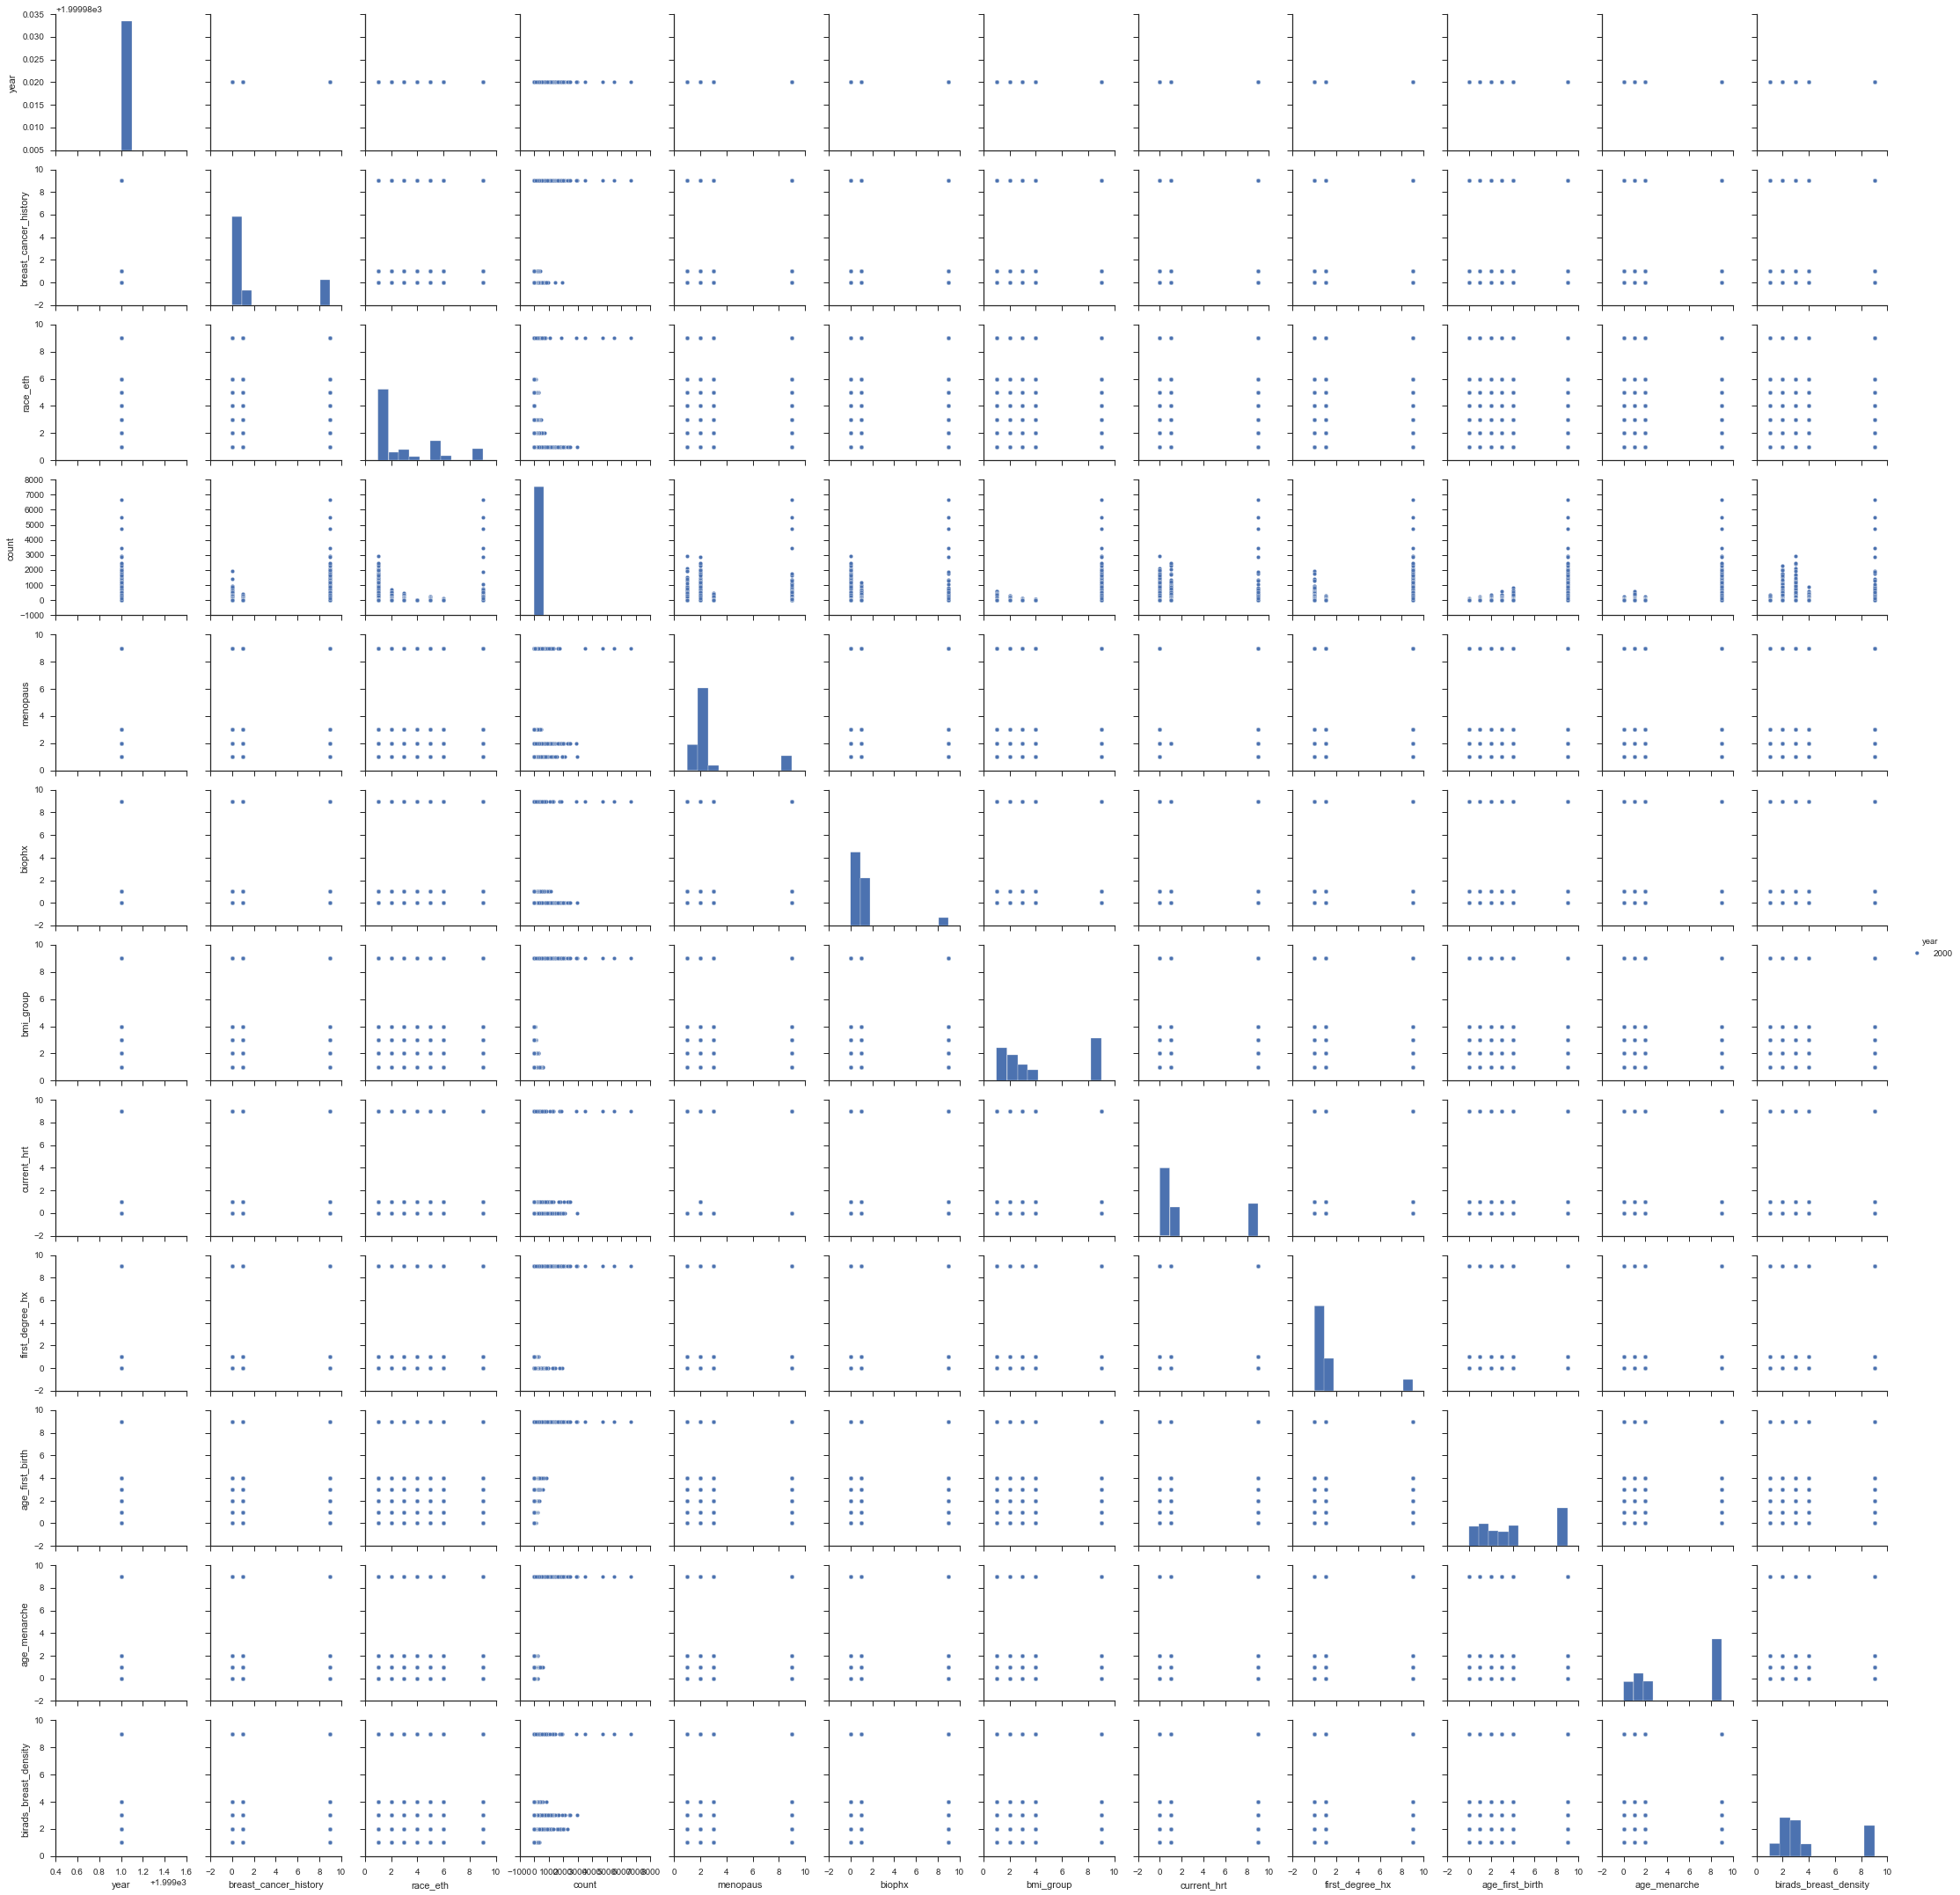

In [28]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=risk_data[risk_data['year'] ==2000][["year", 'breast_cancer_history', 'race_eth','count','menopaus','biophx','bmi_group','current_hrt','first_degree_hx','age_first_birth','age_menarche','birads_breast_density']], hue="year", dropna=True)

In [1320]:
# PUTTING SOME DOCUMENTATION HERE FOR ME TO WORK

# Age
# The risk of developing breast cancer increases with age. The great majority of breast cancer cases occur in women older than age 50. Most cancers develop slowly over time. For this reason, breast cancer is more common among older women.
# The calculator is NOT applicable to women younger than age 35 or older than age 74
# Race/ethnicity
# The risk calculator is calibrated for non-Hispanic white, non-Hispanic black, Asian/Native Hawaiian/Pacific Islander, Native American/Native Alaskan, and Hispanic women. If the woman's race/ethnicity is other or unknown, the tool will use data for non-Hispanic white women to estimate the risk.
# Family history
# Having one or more first-degree relatives (mother, sisters, daughters) who have had breast cancer increases a woman's chances of developing this disease.
# Breast biopsy
# Women who have had breast biopsies have an increased risk of breast cancer, especially if their biopsy specimens showed atypical ductal hyperplasia or lobular carcinoma in situ. Women who have a history of breast biopsies are at increased risk because of breast changes that can be observed on mammograms and prompt the biopsies. Breast biopsies themselves do not cause cancer.
# Breast density
# Women who have high breast density have an increased risk of breast cancer. Breast density is determined by the relative amounts of fat, epithelial, and connective tissues that appear differently on a mammogram due to differences in X-ray attenuation. Fat appears radiolucent or dark, while epithelial and connective tissues are radiographically dense and appear light or white. A dense breast has less fat than glandular and connective tissue. Mammograms of breasts with high density are harder to read and interpret than those of less 
# dense breasts and women with dense breasts are more likely to develop breast cancer.


# Assessment categories in the BI-RADS manual:
# • 0 indicates that additional imaging evaluation is needed (i.e., incomplete assessment)
# • 1-5 indicate the level of suspicion for malignancy
# 1: negative
# 2: benign finding
# 3: probably benign finding
# 4: suspicious abnormality
# 5: highly suggestive of malignancy
# • 6 indicates a known biopsy-proven malignancy

# A BI-RADS 6 assessment should not appear in analyses of screening exams (and thus, should be excluded)



# For the final result (resfnl_c), 
# BI-RADS assessments 1, 2, and 3 are negative; 
# 4 and 5 are positive. Typically, 
# unresolved BI-RADS 0s are excluded; 
# however, one should consider a sensitivity analysis that treats zeros as (a) 
#all positive and (b) all negative, to ensure that exclusion does not bias the results. 
#(Some women with an unresolved BI-RADS 0 exam may have had a biopsy that was not captured by BCSC. 
# Excluding these exams may underestimate the percentage with a biopsy or biopsy recommendation.) 
# According to the BI-RADS guidelines, 
# the final result is used with screening exams for these performance measures: 
# false-positive biopsy recommendation rate, PPV2, 
# and PPV3 (see PERFORMANCE MEASURES) 
# and for all performance measures with diagnostic mammograms. 
# Note that PPV1 is not defined for diagnostic mammograms; in that case, it is the same as PPV2.
  

### PairPlot to visualize correlation.

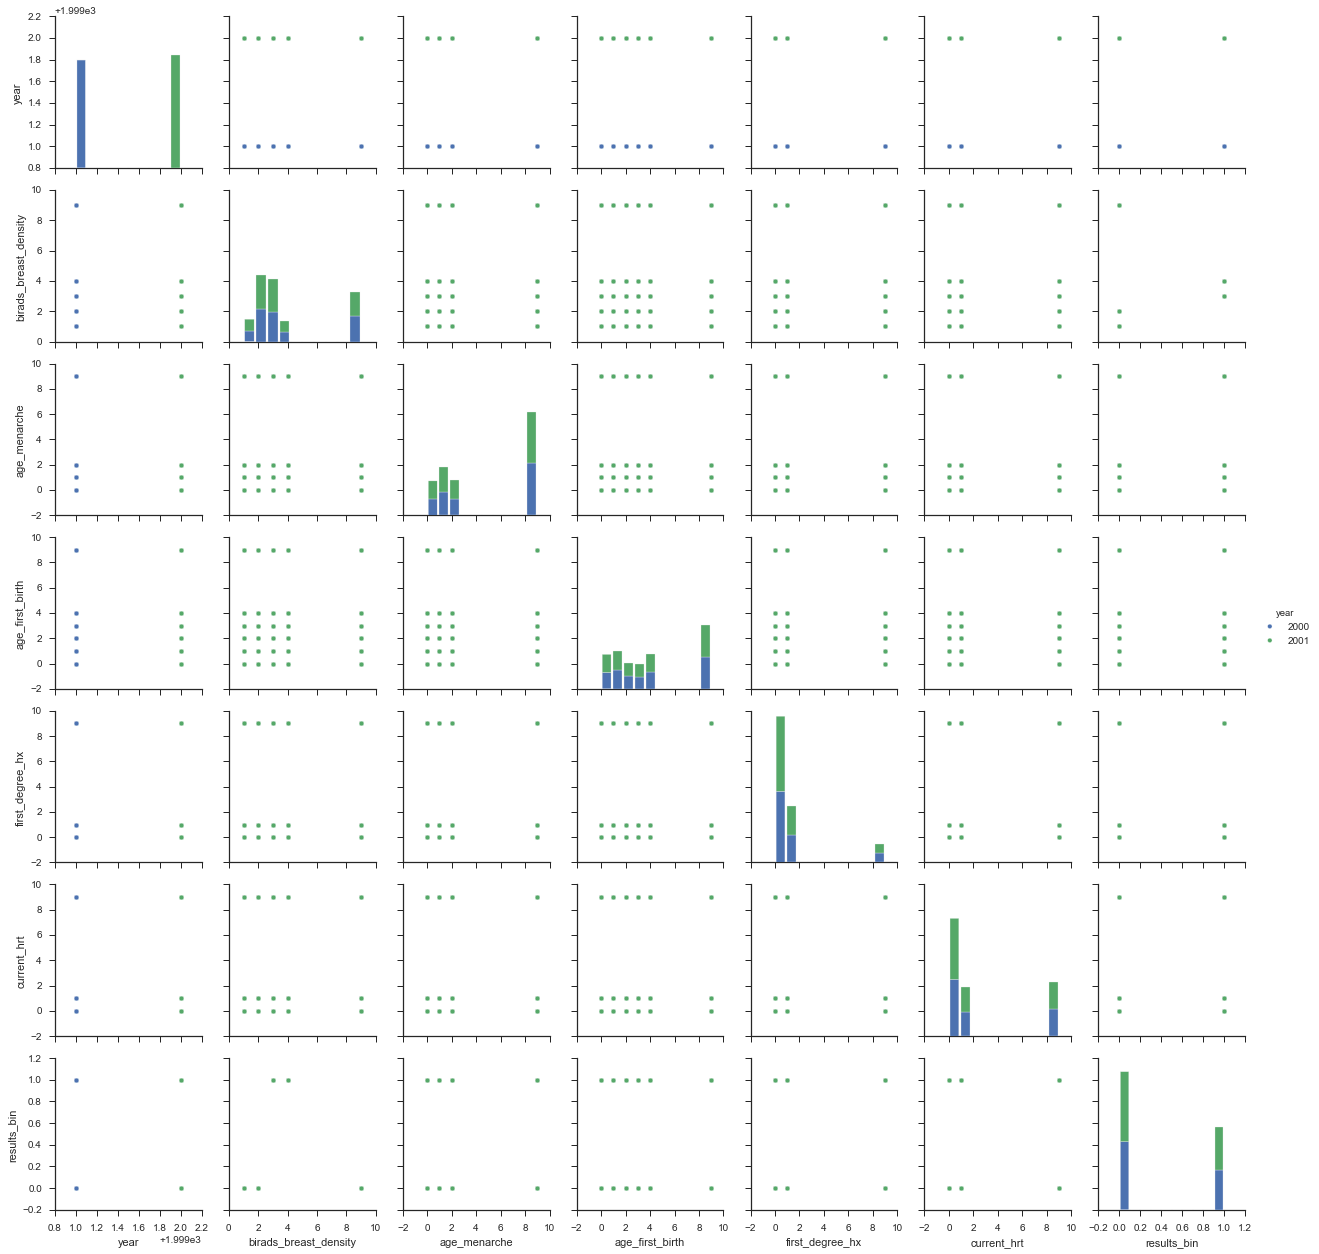

In [27]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=risk_data[risk_data['year'].isin([2000, 2001])][["year", 'birads_breast_density', 'age_menarche', 'age_first_birth', 'first_degree_hx',\
                                                      'current_hrt', 'results_bin']], hue="year", dropna=True)

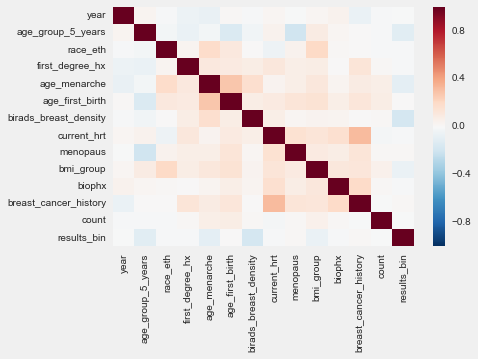

In [1300]:
#CHECK CORRELATIONS with heatmap
sns.heatmap(risk_data.corr());

### Checking how the dataset is composed in terms of the target variable birads_breast_density

In [476]:
index = (risk_data['birads_breast_density'].value_counts().index).tolist()
df = pd.DataFrame(index=index, columns=['Density_count','Perc' ])
df['Density_count'] = risk_data['birads_breast_density'].value_counts()
df['Perc'] = (risk_data['birads_breast_density'].value_counts()/
              np.sum(risk_data['birads_breast_density'].value_counts()))*100
df

,Density_count,Perc
2,332749,29.072118
3,317509,27.740607
9,253767,22.171499
1,132881,11.609748
4,107658,9.406027


In [27]:
%%sql
select count(*) from  risk_data;

1 rows affected.


count
1144564


In [28]:
from pandas.io import sql

In [29]:
# create birads_breast_density labels 
def func(n, label_list):
    for i,j in label_list:
        if n == i:
            return j 
        else:
            continue 
    

### Creating Engine to be able to safe SQL comands into DataFrames directly

In [30]:
import sqlalchemy
# create engine to run sql commands
engine = sqlalchemy.create_engine('postgresql://mariapichardo@localhost:5432/cancer_data')
connect_pos = engine.connect()

####  DECIDED TO SELECT 5,000 RANDOM RECORDS FOR MODELING USING POSTGRES SQL - MODELING WAS TAKING TOO MUCH TIME AND KERNEL WAS DYING 
#### RECORDS  WITH birads_breast_density = "9-UNKOWN"  won't be part of the train and test set. The plan is to create a separate dataset with them and then predict the results

<cr> <cr>
<font color="red"> Note: The name of my dataset with the random records is "df2008_2009" BUT IT DOES NOT MEAN THAT ONLY THOSE YEARS ARE THERE. Originally I took two years but realized that if was not an efficient way to randomnized my records and use the SQL random function instead </font>  

In [ ]:
#  At First I tried to get 5,000 random records for modeling using the postgres SQL below:
read_tables = 'SELECT  * FROM  risk_data ORDER BY RANDOM() LIMIT 5000;'
df2008_2009 = sql.read_sql(read_tables, con=connect_pos)
df2008_2009.head()


In [ ]:
#  NEXT GOT  5,000 random records for modeling using SQL BUT with no 9 records 
read_tables = 'SELECT  * FROM  risk_data where birads_breast_density <> 9 ORDER BY RANDOM() LIMIT 5000;'
df2008_2009 = sql.read_sql(read_tables, con=connect_pos)
df2008_2009.head()




#### birads_breast_density table



In [481]:

label_list = [(1, "1- Almost entirely fat"), (2, "2- Scattered fibroglandular densities"), \
              (3, "3- Heterogeneously dense"),(4, "4- Extremely dense"), (9, "9- Unknown")]

read_tables = 'SELECT  birads_breast_density, count(birads_breast_density) as count, \
to_char((count(birads_breast_density)/(select count(*) from  risk_data)::float)*100, \'FM999999999.00\') \
as perc FROM  risk_data group by birads_breast_density; '
density = sql.read_sql(read_tables, con=connect_pos)
density['labels'] = density['birads_breast_density'].apply(lambda x: func(x, label_list))
density = density.sort(['birads_breast_density'])
density                          

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,birads_breast_density,count,perc,labels
1,1,132881,11.61,1- Almost entirely fat
3,2,332749,29.07,2- Scattered fibroglandular densities
4,3,317509,27.74,3- Heterogeneously dense
0,4,107658,9.41,4- Extremely dense
2,9,253767,22.17,9- Unknown


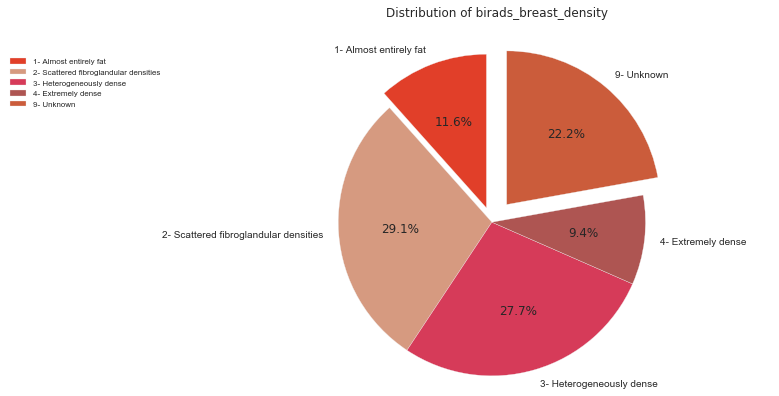

In [1197]:
colors = ["#E13F29", "#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)classes
    density['count'],
    # with the labels being officer names
    labels= density['labels'].tolist(),
    #labels = density['labels'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.1, 0, 0,0,0.15,),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
# plt.figure(figsize=)
plt.axis('equal')
plt.legend((density['labels']).tolist(), loc=1, bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
t =  plt.title('Distribution of birads_breast_density')
t.set_y(1.09) 
# View the plot
plt.tight_layout()
plt.show()


#### We can see in the above Pie Chart 
- That 22.2 % of our dataset has birads_breast_density UNKNOWN.

- 40.7% is under birads_breast_density 1 and 2 which is considered "Benign". 
- And 37% is under birads_breast_density 3 and 4 which will require extra screening.


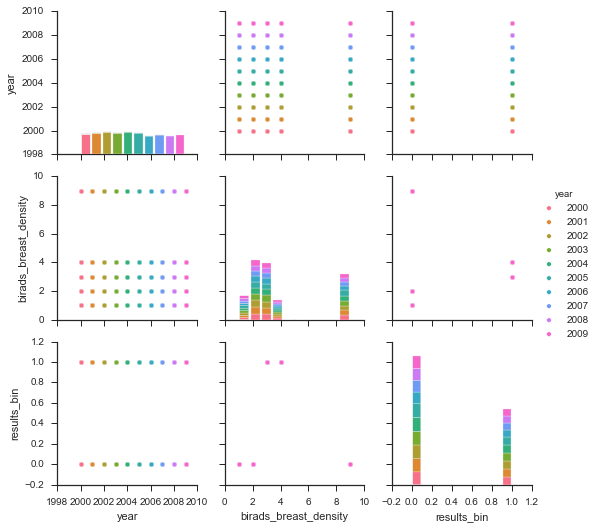

In [39]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=risk_data[["year", 'birads_breast_density', 'results_bin']], hue="year", dropna=True)

### Just checking distribution of birads_breast_density

In [33]:
read_tables = 'SELECT  year, avg(birads_breast_density) as avg, stddev(birads_breast_density) as std \
FROM  risk_data group by year order by year; '
ts = sql.read_sql(read_tables, con=connect_pos)
ts

,year,avg,std
0,2000,4.005131,2.866874
1,2001,3.860134,2.778417
2,2002,3.861063,2.789602
3,2003,3.890144,2.816705
4,2004,3.999062,2.887243
5,2005,4.003899,2.898665
6,2006,3.994833,2.881010
7,2007,3.854571,2.809627
8,2008,3.717473,2.756918
9,2009,3.807342,2.807594


In [1301]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('mariapichardo', 'efxdg3vty3')

import numpy as np


trace0 = go.Scatter(
    x=(ts['year']).tolist(),
          y=(ts['std']).tolist()
)

data = [trace0]

layout = dict(title = 'Average birads_breast_density per year',
              yaxis = dict(zeroline = False, title = 'birads_breast_density '), 
              xaxis = dict(zeroline = False, title = 'Year')
             )


fig = dict(data=data, layout=layout)
py.iplot(fig, filename='styled-scatter-Average-birads-per-year')

In [1302]:


# <div>
#     <a href="https://plot.ly/~mariapichardo/294/" target="_blank" title="Average birads_breast_density per year" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/294.png" alt="Average birads_breast_density per year" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:294"  src="https://plot.ly/embed.js" async></script>
# </div>





### Checking Dataset composition in terms of race_eth

In [1281]:
label_list2 = [(1, "1- Non-Hispanic white"), (2, "2- Non-Hispanic black"), \
              (3, "3- Asian/Pacific Islander"),(4, "4- Native American"), \
              (5, "5- Hispanic"),(6, "6- Other/mixed"), (9, "9- Unknown")]

read_tables = 'SELECT  race_eth, count(race_eth) as count, \
to_char((count(race_eth)/(select count(*) from  risk_data)::float)*100, \'FM999999999.00\') \
as perc FROM  risk_data group by race_eth order by count; '
race_eth = sql.read_sql(read_tables, con=connect_pos)
race_eth['labels'] = race_eth['race_eth'].apply(lambda x: func(x, label_list2))
race_eth

,race_eth,count,perc,labels
0,4,24028,2.10,4- Native American
1,6,56721,4.96,6- Other/mixed
2,2,73243,6.40,2- Non-Hispanic black
3,9,75532,6.60,9- Unknown
4,3,115561,10.10,3- Asian/Pacific Islander
5,5,159443,13.93,5- Hispanic
6,1,640036,55.92,1- Non-Hispanic white


In [1303]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('mariapichardo', 'efxdg3vty3')

y=(race_eth['labels']).tolist()
x=(race_eth['perc']).tolist()
    
    
trace1 = go.Bar(
    y=(race_eth['labels']).tolist(),
    x=(race_eth['perc']).tolist(),
    name='Percentage',
    orientation = 'h',
    marker = dict(
        color = 'rgba(246, 78, 139, 0.6)',
        line = dict(
            color = 'rgba(246, 78, 139, 1.0)',
            width = 2)
    )
)


layout = go.Layout(
             title = 'Breast Cancer Data Population by Race',
            yaxis1=dict(
                showgrid=False,
                showline=True,
                showticklabels=True,
                domain=[0, 0.85],
            ),
            xaxis1=dict(
                zeroline=False,
                showline=True,
                showticklabels=True,
                showgrid=True,
                domain=[0, 0.90],
            ),
            legend=dict(
                x=0.029,
                y=1.038,
                font=dict(
                    size=10,
                ),
            ),
            margin=dict(
                l=200,
                r=20,
                t=70,
                b=70,
            ),
             paper_bgcolor='rgb(248, 248, 255)',
             plot_bgcolor='rgb(248, 248, 255)'
             )



annotations = []

layout['annotations'] = annotations

y_s = x

data = [trace1]

# Adding labels
for yd, xd in zip(y_s, y):
    # labeling the bar net worth
    layout['annotations'] = annotations 
    annotations.append(dict(xref='x1', yref='y1',
                                 y=xd , x= float(yd) + 3, 
                                 text=str(yd) + '%',
                                 font=dict(family='Arial', size=12,
                                           color='rgba(246, 78, 139, 1.0)'),
                                 showarrow=False))
    layout['annotations'] = annotations 
    
fig['layout'].update(layout)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='horizontal-bar-population-by-race')


#### We can see in the above Horizontal Bar Chart above that more than the half of the dataset is composed of NOn-Hispanic White women patiens. 44.08% other races being lead by "Hispanic" with 13.93%

In [ ]:
# <div>
#     <a href="https://plot.ly/~mariapichardo/278/" target="_blank" title="Breast Cancer Data Population by Race" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/278.png" alt="Breast Cancer Data Population by Race" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:278"  src="https://plot.ly/embed.js" async></script>
# </div>

In [792]:
label_list3 = [(1, "1- Age 18-29"), (2, "2- Age 30-34"), \
              (3, "3- Age 35-39"),(4, "4- Age 40-44"), \
              (5, "5- Age 45-49"),(6, "6- Age 50-54"),(7, "7- Age 55-59"),\
               (8, "8- Age 60-64"),(9, "9- Age 65-69"),(10, "10- Age 70-74"),\
               (11, "11- Age 75-79"),(12, "12- Age 80-84"),(13, "13- Age >85")]

read_tables = 'SELECT  age_group_5_years, count(age_group_5_years) as count, \
to_char((count(age_group_5_years)/(select count(*) from  risk_data)::float)*100, \'FM999999999.00\') \
as perc FROM  risk_data group by age_group_5_years; '
age_group = sql.read_sql(read_tables, con=connect_pos)
age_group['labels'] = age_group['age_group_5_years'].apply(lambda x: func(x, label_list3))
age_group = age_group.sort(['count'], ascending=[1])
age_group2 = age_group.sort(['age_group_5_years'], ascending=[1])
age_group2



/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,age_group_5_years,count,perc,labels
3,1,5990,.52,1- Age 18-29
4,2,16665,1.46,2- Age 30-34
5,3,45608,3.98,3- Age 35-39
8,4,117555,10.27,4- Age 40-44
9,5,162427,14.19,5- Age 45-49
0,6,203126,17.75,6- Age 50-54
12,7,133207,11.64,7- Age 55-59
1,8,116608,10.19,8- Age 60-64
11,9,100019,8.74,9- Age 65-69
6,10,86026,7.52,10- Age 70-74


In [1291]:
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('mariapichardo', 'efxdg3vty3')


y=(age_group['labels']).tolist()
x=(age_group['perc']).tolist()

trace0 = go.Bar(
    y=(age_group['labels']).tolist(),
    x=(age_group['perc']).tolist(),
    name='Percentage',
    orientation = 'h',
    marker = dict(
        color = 'rgba(50, 171, 96, 0.6)',
        line = dict(
            color = 'rgb(50, 171, 96)',
            width = 2)
    )
)


trace1 = go.Bar(
    y=(age_group2['labels']).tolist(),
    x=(age_group2['perc']).tolist(),
    name='Percentage',
    orientation = 'h',
    marker = dict(
        color = 'rgba(50, 171, 96, 0.6)',
        line = dict(
            color = 'rgb(50, 171, 96)',
            width = 2)
    )
)


layout = go.Layout(
            title = 'Breast Cancer Data Population by Age',
            yaxis1=dict(
                showgrid=False,
                showline=True,
                showticklabels=True,
                domain=[0, 0.90],
            ),
            xaxis1=dict(
                zeroline=False,
                showline=True,
                showticklabels=True,
                showgrid=True,
                domain=[0, 0.70],
            ),
            legend=dict(
                x=0.029,
                y=1.038,
                font=dict(
                    size=10,
                ),
            ),
            margin=dict(
                l=200,
                r=20,
                t=70,
                b=90,
            ),
             paper_bgcolor='rgb(248, 248, 255)',
             plot_bgcolor='rgb(248, 248, 255)'
             )


data = [trace0]

annotations = []

layout['annotations'] = annotations

y_s = x

# Adding labels
for yd, xd in zip(y_s, y):
    # labeling the bar net worth
    layout['annotations'] = annotations 
    annotations.append(dict(xref='x1', yref='y1',
                                 y=xd , x= float(yd) + 2, 
                                 text=str(yd) + '%',
                                 font=dict(family='Arial', size=12,
                                           color='rgb(50, 171, 96)'),
                                 showarrow=False))
    layout['annotations'] = annotations 
    
fig['layout'].update(layout)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='horizontal-bar-population-by-age')



In [ ]:
# <div>
#     <a href="https://plot.ly/~mariapichardo/284/" target="_blank" title="Breast Cancer Data Population by Age" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/284.png" alt="Breast Cancer Data Population by Age" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:284"  src="https://plot.ly/embed.js" async></script>
# </div>



In [1309]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

py.sign_in('mariapichardo', 'efxdg3vty3')

import numpy as np

y_1 = (age_group['labels']).tolist()
x_1 = (age_group['perc']).tolist()

y_2 = (age_group2['perc']).tolist()
x_2 = (age_group2['labels']).tolist()



trace0 = go.Bar(
    x=x_1,
    y=y_1,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Ordered by Percentage ',
    orientation='h',
)
trace1 = go.Bar(
    x=x_2,
    y=y_2,
    marker=dict(
        color='rgb(128, 0, 128)',
        line=dict(
            color='rgb(128, 0, 128)',
            width=1),
    ),
    name='Ordered by age group ',
)
layout = dict(
    title = 'Breast Cancer Data Population by Age',
    yaxis1=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    xaxis1=dict(
        zeroline=False,
        showline=True,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=True,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        #side='top',
        #dtick=25000,
    ),
    legend=dict(
        x=0.029,
        y=1.038,
        font=dict(
            size=10,
        ),
    ),
    margin=dict(
        l=100,
        r=40,
        t=100,
        b=90
        ,
    ),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []


# Adding labels
for ydn, yd, xd, xdn in zip(y_2, x_1, y_1, x_2):
    
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, x=float(yd) + 2,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))



layout['annotations'] = annotations
#print layout['annotations']


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=False,
                          shared_yaxes=False, vertical_spacing=0.005)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

#print fig['layout']

fig['layout'].update(layout)

#py.image.save_as(fig, filename='Distri_2axis.png')

py.iplot(fig, filename='Distri_2axis-population-by-age')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



#### The chart above tells us that the most records are from Women on the age range 50-54. Followed by range 45-49. 
#### We can also infer that from 40-64 women tend to do their mamogram more actively.

In [ ]:
# <div>
#     <a href="https://plot.ly/~mariapichardo/278/" target="_blank" title="Breast Cancer Data Population by Age" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/278.png" alt="Breast Cancer Data Population by Age" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:278"  src="https://plot.ly/embed.js" async></script>
# </div>



#### Age_menarche is how old the patient was when she got her first period. It seens to be one of the factor with more incidence


In [793]:
label_list5 = [(0, "0 = Age >14"), (1, "1 = Age 12-13"), \
              (2, "2 = Age <12"),(9, "9 = Unknown")]

read_tables = 'SELECT  age_menarche, count(age_menarche) as count, \
to_char((count(age_menarche)/(select count(*) from  risk_data)::float)*100, \'FM999999999.00\') \
as perc FROM  risk_data group by age_menarche; '
age_menarche = sql.read_sql(read_tables, con=connect_pos)
age_menarche['labels'] = age_menarche['age_menarche'].apply(lambda x: func(x, label_list5))
age_menarche = age_menarche.sort(['count'], ascending=[1])
age_menarche

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,age_menarche,count,perc,labels
3,0,193783,16.93,0 = Age >14
1,2,205151,17.92,2 = Age <12
0,1,263649,23.03,1 = Age 12-13
2,9,481981,42.11,9 = Unknown


#### first_degree_hx -  Family history of breast cancer in a first-degree relative (mother, sister or daughter) this another important factor as per the correlation so far.




In [799]:
label_list7 = [(0, "0 = No"), (1, "1 = Yes"),(9, "9 = Unknown")]

read_tables = 'SELECT  first_degree_hx, count(first_degree_hx) as count, \
to_char((count(first_degree_hx)/(select count(*) from  risk_data)::float)*100, \'FM999999999.00\') \
as perc FROM  risk_data group by first_degree_hx; '
first_degree_hx = sql.read_sql(read_tables, con=connect_pos)
first_degree_hx['labels'] = first_degree_hx['first_degree_hx'].apply(lambda x: func(x, label_list7))
first_degree_hx = first_degree_hx.sort(['count'], ascending=[1])
first_degree_hx

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,first_degree_hx,count,perc,labels
1,9,71416,6.24,9 = Unknown
0,1,308665,26.97,1 = Age 12-13
2,0,764483,66.79,0 = Age >14



#### breast_cancer_history - History of a breast biopsy (core biopsy, excisional biopsy or fine-needle aspiration) with benign breast disease diagnoses if known

In [802]:
label_list8 = [(0, "0 = No"), (1, "1 = Yes"),(9, "9 = Unknown")]

read_tables = 'SELECT  breast_cancer_history, count(breast_cancer_history) as count, \
to_char((count(breast_cancer_history)/(select count(*) from  risk_data)::float)*100, \'FM999999999.00\') \
as perc FROM  risk_data group by breast_cancer_history; '
breast_cancer_history = sql.read_sql(read_tables, con=connect_pos)
breast_cancer_history['labels'] = breast_cancer_history['breast_cancer_history'].apply(lambda x: func(x, label_list8))
breast_cancer_history = breast_cancer_history.sort(['count'], ascending=[1])
breast_cancer_history

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,breast_cancer_history,count,perc,labels
1,1,142474,12.45,1 = Yes
0,9,219562,19.18,9 = Unknown
2,0,782528,68.37,0 = No


In [1329]:
label_list = [(1, "1- Almost entirely fat"), (2, "2- Scattered fibroglandular densities"), \
              (3, "3- Heterogeneously dense"),(4, "4- Extremely dense"), (9, "9- Unknown")]

read_tables = 'SELECT  birads_breast_density, count(*) FILTER (where breast_cancer_history = 0) as NO_CANCER_HISTORY, \
count(*) FILTER (where breast_cancer_history = 1) as YES_CANCER_HISTORY , \
count(*) FILTER (where breast_cancer_history = 9) as UNKNOWN_CANCER_HISTORY \
FROM  risk_data group by birads_breast_density; '
combine = sql.read_sql(read_tables, con=connect_pos)
combine['labels'] = combine['birads_breast_density'].apply(lambda x: func(x, label_list))
combine = combine.sort(['birads_breast_density'])
combine

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,birads_breast_density,no_cancer_history,yes_cancer_history,unknown_cancer_history,labels
1,1,96118,14287,22476,1- Almost entirely fat
3,2,225963,41927,64859,2- Scattered fibroglandular densities
4,3,215604,37792,64113,3- Heterogeneously dense
0,4,78451,9191,20016,4- Extremely dense
2,9,166392,39277,48098,9- Unknown


In [833]:
#history of breast cancer in a first-degree relative (mother, sister or daughter)

read_tables = 'SELECT  birads_breast_density, count(*) FILTER (where first_degree_hx = 0) as NO_Relative_CANCER_HISTORY, \
count(*) FILTER (where first_degree_hx = 1) as YES_Relative_CANCER_HISTORY , \
count(*) FILTER (where first_degree_hx = 9) as UNKNOWN_Relative_CANCER_HISTORY \
FROM  risk_data group by birads_breast_density; '
combine2 = sql.read_sql(read_tables, con=connect_pos)
combine2['labels'] = combine2['birads_breast_density'].apply(lambda x: func(x, label_list))
combine2 = combine2.sort(['birads_breast_density'])
combine2

/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,birads_breast_density,no_relative_cancer_history,yes_relative_cancer_history,unknown_relative_cancer_history,labels
1,1,94160,33083,5638,1- Almost entirely fat
3,2,222181,93310,17258,2- Scattered fibroglandular densities
4,3,209822,89293,18394,3- Heterogeneously dense
0,4,74495,27304,5859,4- Extremely dense
2,9,163825,65675,24267,9- Unknown


In [1292]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('mariapichardo', 'efxdg3vty3')

y=(age_menarche['labels']).tolist()
x=(age_menarche['perc']).tolist()

trace0 = go.Bar(
    y=(age_menarche['labels']).tolist(),
    x=(age_menarche['perc']).tolist(),
    name='Percentage',
    orientation = 'h',
    marker = dict(
        color = 'rgba(50, 171, 96, 0.6)',
        line = dict(
            color = 'rgb(50, 171, 96)',
            width = 2)
    )
)


trace1 = go.Bar(
    y=(age_menarche['labels']).tolist(),
    x=(age_menarche['perc']).tolist(),
    name='Percentage',
    orientation = 'h',
    marker = dict(
        color = 'rgba(50, 171, 96, 0.6)',
        line = dict(
            color = 'rgb(50, 171, 96)',
            width = 2)
    )
)


layout = go.Layout(
            title = 'Breast Cancer Data Population by Age menarche (Age at the first Period)',
            yaxis1=dict(
                showgrid=False,
                showline=True,
                showticklabels=True,
                domain=[0, 0.90],
            ),
            xaxis1=dict(
                zeroline=False,
                showline=True,
                showticklabels=True,
                showgrid=True,
                domain=[0, 0.70],
            ),
            legend=dict(
                x=0.029,
                y=1.038,
                font=dict(
                    size=10,
                ),
            ),
            margin=dict(
                l=200,
                r=20,
                t=70,
                b=90,
            ),
             paper_bgcolor='rgb(248, 248, 255)',
             plot_bgcolor='rgb(248, 248, 255)'
             )


data = [trace0]

annotations = []

layout['annotations'] = annotations

y_s = x

# Adding labels
for yd, xd in zip(y_s, y):
    # labeling the bar net worth
    layout['annotations'] = annotations 
    annotations.append(dict(xref='x1', yref='y1',
                                 y=xd , x= float(yd) + 3, 
                                 text=str(yd) + '%',
                                 font=dict(family='Arial', size=12,
                                           color='rgb(50, 171, 96)'),
                                 showarrow=False))
    layout['annotations'] = annotations 
    
fig['layout'].update(layout)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='horizontal-bar-Population-by-Age-menarche')

#### 42.11% of the women do not know, do not remember, or do not provide how old they were when they had their first period. From the remaining 57.8 % 40% of them got their first period at age range 12-13

In [ ]:
# <div>
#     <a href="https://plot.ly/~mariapichardo/286/" target="_blank" title="Breast Cancer Data Population by Age menarche (Age at the first Period)" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/286.png" alt="Breast Cancer Data Population by Age menarche (Age at the first Period)" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:286"  src="https://plot.ly/embed.js" async></script>
# </div>



In [1293]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('mariapichardo', 'efxdg3vty3')

trace1 = go.Bar(
    x=(combine['labels']).tolist(),
    y=(combine['no_cancer_history']).tolist(),
    name='no_cancer_history'
)
trace2 = go.Bar(
    x=(combine['labels']).tolist(),
    y=(combine['yes_cancer_history']).tolist(),
    name='yes_cancer_history'
)

trace3 = go.Bar(
    x=(combine['labels']).tolist(),
    y=(combine['unknown_cancer_history']).tolist(),
    name='unknown_cancer_history'
)


data = [trace1, trace2, trace3]

layout = go.Layout(
    barmode='stack',
    title = 'Patient Cancer History by birads_breast_density', 
    yaxis = dict(zeroline = False, title = 'count '), 
    xaxis = dict(zeroline = False, title = 'birads_breast_density '),
    margin = dict(l=200,r=20,t=70,b=150)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar-Patient-Cancer-History-by-birads')



In [1294]:
# <div>
#     <a href="https://plot.ly/~mariapichardo/288/" target="_blank" title="Patient Cancer History by birads_breast_density" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/288.png" alt="Patient Cancer History by birads_breast_density" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:288"  src="https://plot.ly/embed.js" async></script>
# </div>



In [1295]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('mariapichardo', 'efxdg3vty3')

trace1 = go.Bar(
    x=(combine2['labels']).tolist(),
    y=(combine2['no_relative_cancer_history']).tolist(),
    name='no_relative_cancer_history'
)
trace2 = go.Bar(
    x=(combine2['labels']).tolist(),
    y=(combine2['yes_relative_cancer_history']).tolist(),
    name='yes_relative_cancer_history'
)

trace3 = go.Bar(
    x=(combine2['labels']).tolist(),
    y=(combine2['unknown_relative_cancer_history']).tolist(),
    name='unknown_relative_cancer_history'
)


data = [trace1, trace2, trace3]

layout = go.Layout(
    barmode='stack',
    title = 'History of breast cancer in a first-degree relative (mother, sister or daughter) by birads_breast_density', 
    yaxis = dict(zeroline = False, title = 'count '), 
    xaxis = dict(zeroline = False, title = 'birads_breast_density '),
    margin = dict(l=200,r=20,t=70,b=150)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar-first-degree-relative')



In [1296]:
# <div>
#     <a href="https://plot.ly/~mariapichardo/290/" target="_blank" title="History of breast cancer in a first-degree relative (mother, sister or daughter) by birads_breast_density" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/290.png" alt="History of breast cancer in a first-degree relative (mother, sister or daughter) by birads_breast_density" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:290"  src="https://plot.ly/embed.js" async></script>
# </div>



In [1297]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('mariapichardo', 'efxdg3vty3')

trace1 = go.Bar(
    x=(combine['labels']).tolist(),
    y=(combine['no_cancer_history']).tolist(),
    name='patient_no_cancer_history'
)

trace2 = go.Bar(
    x=(combine2['labels']).tolist(),
    y=(combine2['no_relative_cancer_history']).tolist(),
    name='no_relative_cancer_history'
)
trace3 = go.Bar(
    x=(combine['labels']).tolist(),
    y=(combine['yes_cancer_history']).tolist(),
    name='patient_yes_cancer_history'
)

trace4 = go.Bar(
    x=(combine2['labels']).tolist(),
    y=(combine2['yes_relative_cancer_history']).tolist(),
    name='yes_relative_cancer_history'
)


data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    barmode='stack',
    title = 'Relationship between patient breast cancer and first-degree relative cancer history', 
    yaxis = dict(zeroline = False, title = 'count '), 
    xaxis = dict(zeroline = False, title = 'birads_breast_density '),
    margin = dict(l=200,r=20,t=70,b=150)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='stacked-bar-Relationship-patient_relative')

In [1330]:
# <div>
#     <a href="https://plot.ly/~mariapichardo/292/" target="_blank" title="Relationship between patient breast cancer and first-degree relative cancer history" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/292.png" alt="Relationship between patient breast cancer and first-degree relative cancer history" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:292"  src="https://plot.ly/embed.js" async></script>
# </div>



In [1299]:
read_tables = 'SELECT  birads_breast_density,  race_eth, count(race_eth) as race_count \
FROM  risk_data group by birads_breast_density, race_eth order by birads_breast_density, race_eth; '
race_combine = sql.read_sql(read_tables, con=connect_pos)
race_combine['birads_labels'] = race_combine['birads_breast_density'].apply(lambda x: func(x, label_list))
race_combine['race_labels'] = race_combine['race_eth'].apply(lambda x: func(x, label_list2))
race_combine = race_combine.sort(['birads_breast_density'])
race_combine


/Users/mariapichardo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



,birads_breast_density,race_eth,race_count,birads_labels,race_labels
0,1,1,79598,1- Almost entirely fat,1- Non-Hispanic white
1,1,2,9225,1- Almost entirely fat,2- Non-Hispanic black
2,1,3,6603,1- Almost entirely fat,3- Asian/Pacific Islander
3,1,4,2983,1- Almost entirely fat,4- Native American
4,1,5,20126,1- Almost entirely fat,5- Hispanic
5,1,6,5126,1- Almost entirely fat,6- Other/mixed
6,1,9,9220,1- Almost entirely fat,9- Unknown
13,2,9,23259,2- Scattered fibroglandular densities,9- Unknown
12,2,6,17613,2- Scattered fibroglandular densities,6- Other/mixed
11,2,5,49859,2- Scattered fibroglandular densities,5- Hispanic


In [893]:
race_combine.birads_breast_density.value_counts()

9    7
4    7
3    7
2    7
1    7
Name: birads_breast_density, dtype: int64

In [901]:
race_combine["birads_breast_density"].count()
race_combine.columns
#race_combine[["race_count", 'race_eth']]

Index([u'birads_breast_density',              u'race_eth',
                  u'race_count',         u'birads_labels',
                 u'race_labels'],
      dtype='object')

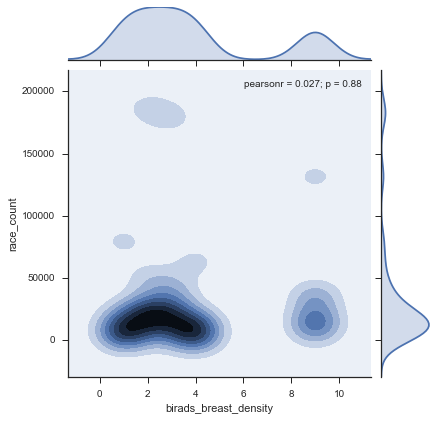

In [907]:
sns.jointplot("birads_breast_density", "race_count", data=race_combine, kind='kde')  
  

#### This jointplot shows that most of population in concentrated  on the BiRads between 2 and 3 

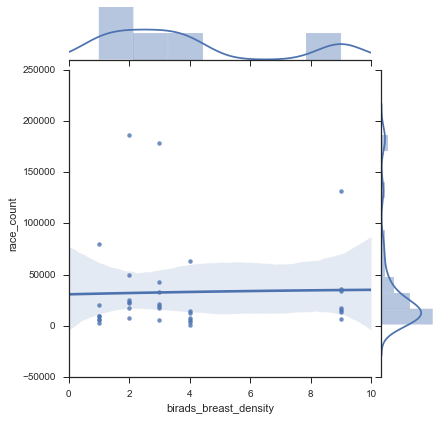

In [910]:
g = sns.JointGrid(x="birads_breast_density", y="race_count", data=race_combine)  
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)  

In [915]:
len(race_combine)

35

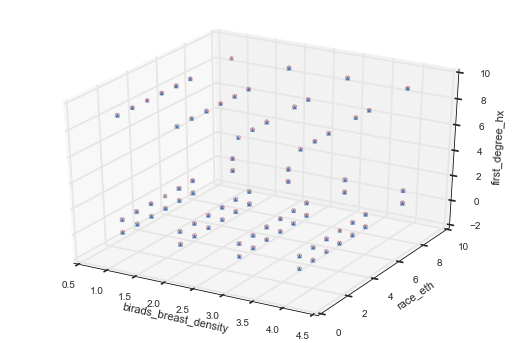

In [926]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = len(risk_data)
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = df2008_2009["birads_breast_density"]
    ys = df2008_2009["race_eth"]
    zs = df2008_2009["first_degree_hx"]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('birads_breast_density')
ax.set_ylabel('race_eth')
ax.set_zlabel('first_degree_hx')

plt.show()

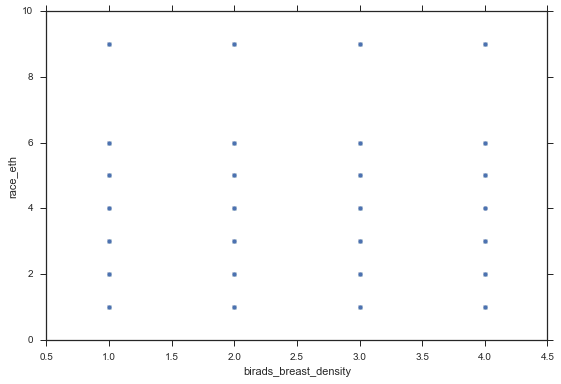

In [923]:
# relationship 
df2008_2009.plot(kind='scatter',x= 'birads_breast_density',y='race_eth')

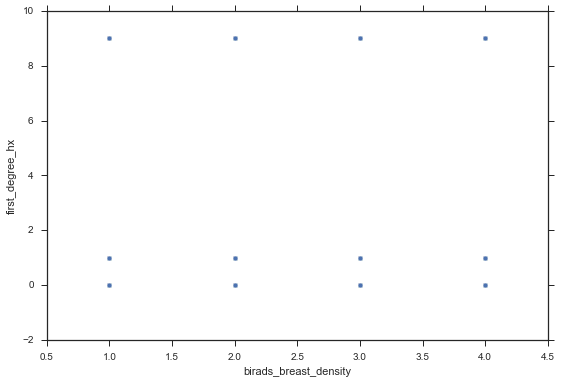

In [925]:
# relationship 
df2008_2009.plot(kind='scatter', x= 'birads_breast_density',y='first_degree_hx')

#### I created this patsy function and the feature list  from the correlation list. At the end I DID NOT USE THE PATSY FUNCTION but dummify the features using the pandas "get_dummies: function. This way my score went up a bit. The reason being that I selected myself which column to delete. I deleted all the uknown columns to train the model.

In [247]:
# List of feature to create the Dummies via patsy

feat_list_dummy =  '~ C(age_group_5_years) + C(race_eth) + C(first_degree_hx) + C(age_menarche) + C(age_first_birth)\
  + C(current_hrt) + C(menopaus) + C(bmi_group) + C(biophx) + C(breast_cancer_history)'

In [248]:
# age_menarche             0.164977
# age_first_birth          0.077031
# first_degree_hx          0.073193
# current_hrt              0.065269
# bmi_group                0.033964
# biophx                   0.023473
# menopaus                 0.017091
# count                    0.014252
# race_eth                 0.005664  - Min / Max  Scaler 
# breast_cancer_history    0.004743
# age_group_5_years       -0.033629

In [249]:
# Function to return dummy variables for certain columns

import patsy

def get_features(dataframe):
    
   features = patsy.dmatrix(feat_list, dataframe)
   X_df = pd.DataFrame(features, columns=features.design_info.column_names)
   X_df.drop('Intercept', axis=1, inplace=True)
   return X_df

<h3> <font color="red"> Originally I chose most of the features. After taken a closer look I cut out a couple of them, manually chose the column to delete and the score went up. DataFrame "dff_bestfeat" is the dataset used as "X" for modeling. Decided not to use "dff" for the reasons stayed above. I left it here for me to explain the process I went thru.</font> </h3> 



In [1094]:
dff2 = pd.get_dummies(df2008_2009['age_menarche'], prefix='Agemenar')

In [1095]:
dff3 = pd.get_dummies(df2008_2009['age_group_5_years'], prefix='Agegroup')

In [1096]:
dff4 = pd.get_dummies(df2008_2009['race_eth'], prefix='race')

In [1097]:
dff5 = pd.get_dummies(df2008_2009['first_degree_hx'], prefix='famhist')

In [1098]:
dff6 = pd.get_dummies(df2008_2009['breast_cancer_history'], prefix='pathist')

In [1099]:
dff7 = pd.get_dummies(df2008_2009['age_first_birth'], prefix='age_f_birth')

In [1100]:
dff8 = pd.get_dummies(df2008_2009['current_hrt'], prefix='current_hrt')

In [1101]:
dff9 = pd.get_dummies(df2008_2009['menopaus'], prefix='menopaus')

In [1102]:
dff10 = pd.get_dummies(df2008_2009['bmi_group'], prefix='bmi_group')

In [1103]:
# Drop column for UNKNOWN
del dff2['Agemenar_9']

In [1104]:
# Drop column for group 1 this model is not suitable for this age 
del dff3['Agegroup_1']

In [1106]:
# Drop column for UNKNOWN
del dff4['race_9']

KeyError: 'race_9'

In [1107]:
# Drop column for UNKNOWN
del dff5['famhist_9']

In [1108]:
# Drop column for UNKNOWN
del dff6['pathist_9']

In [1109]:
# Drop column for UNKNOWN
del dff7['age_f_birth_9']

In [1110]:
# Drop column for UNKNOWN
del dff8['current_hrt_9']

In [1111]:
# Drop column for UNKNOWN
del dff9['menopaus_9']

In [1112]:
# Drop column for UNKNOWN
del dff10['bmi_group_9']

In [1113]:
dff_bestfeat = pd.concat([dff2,dff3,dff4,dff5,dff6,dff7,dff8,dff9,dff10], axis = 1)

In [1114]:
dff_bestfeat.shape

(5000, 39)

In [1115]:
len (dff_bestfeat)

5000

In [1116]:
# Creating dummy variables
dff = get_features(risk_data)
dff = get_features(df2008_2009)
dff.head()

,C(breast_cancer_history)[T.1],C(breast_cancer_history)[T.9],C(race_eth)[T.2],C(race_eth)[T.3],C(race_eth)[T.4],C(race_eth)[T.5],C(race_eth)[T.6],C(race_eth)[T.9],C(menopaus)[T.2],C(menopaus)[T.3],...,C(first_degree_hx)[T.1],C(first_degree_hx)[T.9],C(age_first_birth)[T.1],C(age_first_birth)[T.2],C(age_first_birth)[T.3],C(age_first_birth)[T.4],C(age_first_birth)[T.9],C(age_menarche)[T.1],C(age_menarche)[T.2],C(age_menarche)[T.9]
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [1333]:
dff_bestfeat.columns

Index([u'Agemenar_0', u'Agemenar_1', u'Agemenar_2', u'Agegroup_2',
       u'Agegroup_3', u'Agegroup_4', u'Agegroup_5', u'Agegroup_6',
       u'Agegroup_7', u'Agegroup_8', u'Agegroup_9', u'Agegroup_10',
       u'Agegroup_11', u'Agegroup_12', u'Agegroup_13', u'race_1', u'race_2',
       u'race_3', u'race_4', u'race_5', u'race_6', u'famhist_0', u'famhist_1',
       u'pathist_0', u'pathist_1', u'age_f_birth_0', u'age_f_birth_1',
       u'age_f_birth_2', u'age_f_birth_3', u'age_f_birth_4', u'current_hrt_0',
       u'current_hrt_1', u'menopaus_1', u'menopaus_2', u'menopaus_3',
       u'bmi_group_1', u'bmi_group_2', u'bmi_group_3', u'bmi_group_4'],
      dtype='object')

### Concatenating all dummy variables and original dataframe

In [1118]:
len(dff)

5000

In [1119]:
len(df2008_2009)
df2008_2009.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
0,2001,7,1,9,1,3,3,0,2,1,0,0,0.000000,Positive,1
1,2007,11,1,1,0,2,2,1,2,9,1,0,0.005042,Negative,0
2,2005,8,1,0,1,3,2,1,2,2,0,0,0.005042,Negative,0
3,2000,3,3,0,1,9,2,0,1,1,0,0,0.000000,Negative,0
4,2006,6,1,1,2,2,1,0,2,2,0,0,0.000000,Negative,0


In [1120]:
dft = pd.concat([df2008_2009, dff], axis = 1)
dft.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,...,C(first_degree_hx)[T.1],C(first_degree_hx)[T.9],C(age_first_birth)[T.1],C(age_first_birth)[T.2],C(age_first_birth)[T.3],C(age_first_birth)[T.4],C(age_first_birth)[T.9],C(age_menarche)[T.1],C(age_menarche)[T.2],C(age_menarche)[T.9]
0,2001,7,1,9,1,3,3,0,2,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2007,11,1,1,0,2,2,1,2,9,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2005,8,1,0,1,3,2,1,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2000,3,3,0,1,9,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2006,6,1,1,2,2,1,0,2,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [70]:
risk_data.year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

In [101]:
risk_data.dtypes

year                      int64
age_group_5_years         int64
race_eth                  int64
first_degree_hx           int64
age_menarche              int64
age_first_birth           int64
birads_breast_density     int64
current_hrt               int64
menopaus                  int64
bmi_group                 int64
biophx                    int64
breast_cancer_history     int64
count                     int64
results                  object
results_bin               int64
dtype: object

In [105]:
df2008_2009 = risk_data[risk_data.year.isin([2009])]
df2008_2009.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
1035931,2009,1,1,0,0,0,2,0,1,2,0,0,1,Negative,0
1035932,2009,1,1,0,0,4,1,0,1,4,0,0,1,Negative,0
1035933,2009,1,1,0,0,4,3,0,1,1,0,0,2,Positive,1
1035934,2009,1,1,0,0,4,3,0,1,1,1,0,1,Positive,1
1035935,2009,1,1,0,0,4,4,0,1,1,0,0,2,Positive,1


In [95]:
del df2008_2009 ['index']

In [60]:
df2008_2009 = df2008_2009[-df2008_2009.birads_breast_density.isin([9])]
df2008_2009.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
0,2003,5,3,0,0,9,3,0,9,9,0,9,1,Positive,1
1,2000,5,1,0,1,3,2,9,9,2,0,0,1,Negative,0
2,2007,9,3,0,0,4,3,0,2,1,1,0,3,Positive,1
3,2003,8,9,0,9,9,1,0,2,2,0,0,4,Negative,0
4,2009,3,2,0,9,4,4,0,1,3,0,0,1,Positive,1


In [96]:
df2008_2009.birads_breast_density.unique()

array([3, 2, 1, 4])

In [113]:
df2008_2009 = df2008_2009.reset_index(drop=True)

In [103]:
df2008_2009.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
0,2001,7,1,9,1,3,3,0,2,1,0,0,0.000000,Positive,1
1,2007,11,1,1,0,2,2,1,2,9,1,0,0.005042,Negative,0
2,2005,8,1,0,1,3,2,1,2,2,0,0,0.005042,Negative,0
3,2000,3,3,0,1,9,2,0,1,1,0,0,0.000000,Negative,0
4,2006,6,1,1,2,2,1,0,2,2,0,0,0.000000,Negative,0


In [44]:
len(df2008_2009.columns)

15

In [1334]:
# Original feature list. After the first round I tuned the features a bit.

features = ['age_group_5_years', 'race_eth', 'first_degree_hx',
       'age_menarche', 'age_first_birth', 
       'current_hrt', 'menopaus', 'bmi_group', 'biophx',
       'breast_cancer_history', 'count']

In [240]:
# Just checking number/percentage of negative and positive o my random dataset before starting modelind
df2008_2009['results_bin'].value_counts()

0    2620
1    2380
Name: results_bin, dtype: int64

In [100]:
# Scaling continuous columns - AT THE END I TOOK OUT THIS FEATURE "COUNT"

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 9))

df2008_2009[['count']] = scaler.fit_transform(df2008_2009[['count']])

In [256]:
dff['count'] = df2008_2009['count']

## Splitting data to train_test set

In [1123]:
y = df2008_2009['results_bin']
X = dff_bestfeat.copy() 

In [1124]:
X.head()

,Agemenar_0,Agemenar_1,Agemenar_2,Agegroup_2,Agegroup_3,Agegroup_4,Agegroup_5,Agegroup_6,Agegroup_7,Agegroup_8,...,age_f_birth_4,current_hrt_0,current_hrt_1,menopaus_1,menopaus_2,menopaus_3,bmi_group_1,bmi_group_2,bmi_group_3,bmi_group_4
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1125]:
len(X)


5000

In [1126]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

In [1127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [1004]:
X_train['count'].max()

In [1129]:
# y_train['results_bin'].value_counts()
y_train.head()


1924    0
3912    1
4583    1
294     1
2785    1
Name: results_bin, dtype: int64

In [1130]:
X_train.head()

,Agemenar_0,Agemenar_1,Agemenar_2,Agegroup_2,Agegroup_3,Agegroup_4,Agegroup_5,Agegroup_6,Agegroup_7,Agegroup_8,...,age_f_birth_4,current_hrt_0,current_hrt_1,menopaus_1,menopaus_2,menopaus_3,bmi_group_1,bmi_group_2,bmi_group_3,bmi_group_4
1924,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3912,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4583,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2785,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### Used GridsearchCV to measure best estimators and the optimal parameters value and examine the coeficients.


In [1131]:
from sklearn.grid_search import GridSearchCV
C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0]
penalties = ['l1','l2']


gs = GridSearchCV(LogisticRegression(solver='liblinear'),
                 {'C': C_vals,
                 'penalty': penalties},
                 cv=10)
gs.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.15, 0.25, 0.275, 0.33, 0.5, 0.66, 0.75, 1.0, 2.5, 5.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [1132]:
gs.best_estimator_


LogisticRegression(C=0.33, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1133]:
gs.best_params_

{'C': 0.33, 'penalty': 'l1'}

In [1134]:
gs.best_score_

0.61975000000000002

In [1135]:
race_eth

,race_eth,count,perc,labels
0,4,24028,2.10,4- Native American
1,6,56721,4.96,6- Other/mixed
2,2,73243,6.40,2- Non-Hispanic black
3,9,75532,6.60,9- Unknown
4,3,115561,10.10,3- Asian/Pacific Islander
5,5,159443,13.93,5- Hispanic
6,1,640036,55.92,1- Non-Hispanic white


#### CHECKING COEFICIENTS

In [1138]:
coef = pd.DataFrame([(X_train.columns).tolist(), (gs.best_estimator_.coef_[0]).tolist()], index=['features', 'coef']).T
coef.sort_values(by = 'coef', ascending = False, inplace = True)
coef.reset_index(inplace = True)
del coef['index']
coef.head(20)

,features,coef
0,bmi_group_1,0.642909
1,race_3,0.539807
2,current_hrt_1,0.327313
3,menopaus_1,0.266515
4,race_1,0.215945
5,Agegroup_4,0.198482
6,race_2,0.198416
7,age_f_birth_4,0.183188
8,Agemenar_0,0.181986
9,race_6,0.157987


In [273]:
len(coef)

30

In [1336]:
#X_test[['count']] = scaler.fit_transform(X_test[['count']])

In [1010]:
X_test.head()

,Agemenar_0,Agemenar_1,Agemenar_2,Agegroup_2,Agegroup_3,Agegroup_4,Agegroup_5,Agegroup_6,Agegroup_7,Agegroup_8,...,age_f_birth_4,current_hrt_0,current_hrt_1,menopaus_1,menopaus_2,menopaus_3,bmi_group_1,bmi_group_2,bmi_group_3,bmi_group_4
3431,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2042,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4663,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1139]:
y_pred2 = gs.best_estimator_.predict(X_test)
y_score2 = gs.best_estimator_.decision_function(X_test)

In [143]:
# X_test['birads_breast_density'].value_counts()

In [278]:
#y_pred2

#### THE AUC SCORE IS 0.65116190582995559


The graph below shows the ROC curves. The accuracy of the test depends on how well the test separates the group being tested into those with high and low risk of breast cancer. The Accuracy is measured by the area under the ROC curve. 

In [1141]:
# Checking performance of model
import numpy as np


conmat = np.array(confusion_matrix(y_test, y_pred2, labels=[1,0]))
confusion = pd.DataFrame(conmat, index=['Positive', 'Negative'],
                            columns=['predicted_Positive','predicted_Negative'])

print(confusion)
print
print
print classification_report(y_test,y_pred2)
roc_auc_score(y_test, y_score2)

          predicted_Positive  predicted_Negative
Positive                 263                 219
Negative                 149                 369


             precision    recall  f1-score   support

          0       0.63      0.71      0.67       518
          1       0.64      0.55      0.59       482

avg / total       0.63      0.63      0.63      1000



0.65116190582995559

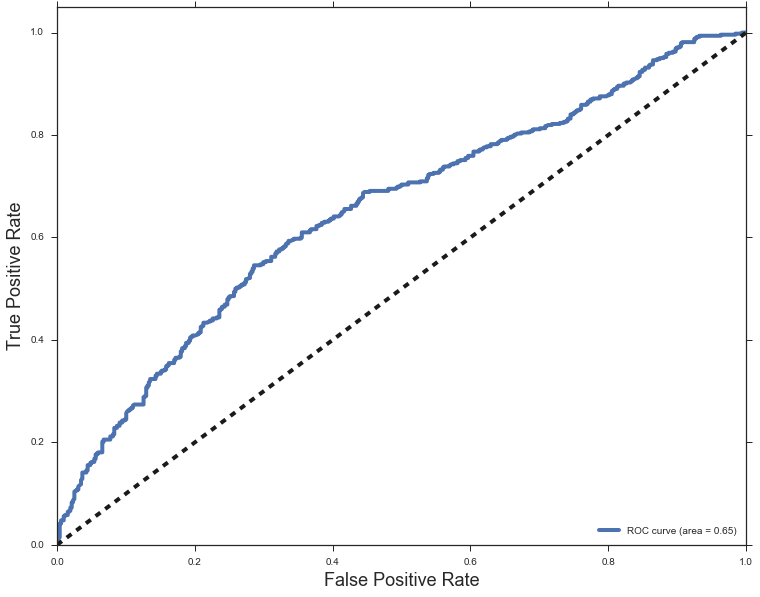

In [1142]:
import matplotlib.pyplot as plt

""" Plot AUC"""

FPR = dict()
TPR = dict()
ROC_AUC = dict()

# Find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score2)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
# plt.title('Receiver operating characteristic for above median pay (%i)' % median_, fontsize=18)
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc_logreg_breast_cancer.png')

### After Getting This ROC I decided to try other classifiers with GridSearchCV and compare them all at the end. 


In [1143]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    a = accuracy_score(y_test, y_pred)
    
    #cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
    cm = pd.DataFrame(conmat, index=['Positive', 'Negative'],
                           columns=['predicted_Positive','predicted_Negative'])


    print ""
    print cm
    print ""
    print ""
    print cr
    
    return a

all_models = {}

## KNN

In [1144]:
from sklearn.neighbors import KNeighborsClassifier

a = evaluate_model(KNeighborsClassifier())


          predicted_Positive  predicted_Negative
Positive                 360                 354
Negative                 330                 456


             precision    recall  f1-score   support

          0       0.56      0.58      0.57       786
          1       0.52      0.50      0.51       714

avg / total       0.54      0.54      0.54      1500



In [1145]:
from sklearn.grid_search import GridSearchCV

params = {'n_neighbors': range(2,60)}

gsknn = GridSearchCV(KNeighborsClassifier(),
                     params, n_jobs=-1,
                     cv=KFold(len(y), n_folds=3, shuffle=True))

In [1146]:
X.head()

,Agemenar_0,Agemenar_1,Agemenar_2,Agegroup_2,Agegroup_3,Agegroup_4,Agegroup_5,Agegroup_6,Agegroup_7,Agegroup_8,...,age_f_birth_4,current_hrt_0,current_hrt_1,menopaus_1,menopaus_2,menopaus_3,bmi_group_1,bmi_group_2,bmi_group_3,bmi_group_4
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1147]:
gsknn.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=5000, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [1148]:
gsknn.best_params_

{'n_neighbors': 50}

In [1149]:
gsknn.best_score_

0.59460000000000002

In [1150]:
evaluate_model(gsknn.best_estimator_)


          predicted_Positive  predicted_Negative
Positive                 315                 399
Negative                 204                 582


             precision    recall  f1-score   support

          0       0.59      0.74      0.66       786
          1       0.61      0.44      0.51       714

avg / total       0.60      0.60      0.59      1500



0.59799999999999998

In [1151]:
all_models['knn'] = {'model': gsknn.best_estimator_,
                     'score': a}

## Bagging + KNN

In [1152]:
from sklearn.ensemble import BaggingClassifier
baggingknn = BaggingClassifier(KNeighborsClassifier())

In [1153]:
evaluate_model(baggingknn)


          predicted_Positive  predicted_Negative
Positive                 374                 340
Negative                 322                 464


             precision    recall  f1-score   support

          0       0.58      0.59      0.58       786
          1       0.54      0.52      0.53       714

avg / total       0.56      0.56      0.56      1500



0.55866666666666664

In [1154]:
bagging_params = {'n_estimators': [10, 20],
                  'max_samples': [0.7, 1.0],
                  'max_features': [0.7, 1.0],
                  'bootstrap_features': [True, False]}


gsbaggingknn = GridSearchCV(baggingknn,
                            bagging_params, n_jobs=-1,
                            cv=KFold(len(y), n_folds=3, shuffle=True))

In [1155]:
gsbaggingknn.fit(X, y)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=5000, n_folds=3, shuffle=True, random_state=None),
       error_score='raise',
       estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [10, 20], 'max_samples': [0.7, 1.0], 'bootstrap_features': [True, False], 'max_features': [0.7, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [1156]:
gsbaggingknn.best_params_

{'bootstrap_features': True,
 'max_features': 0.7,
 'max_samples': 0.7,
 'n_estimators': 20}

In [1157]:
all_models['gsbaggingknn'] = {'model': gsbaggingknn.best_estimator_,
                              'score': evaluate_model(gsbaggingknn.best_estimator_)}


          predicted_Positive  predicted_Negative
Positive                 370                 344
Negative                 285                 501


             precision    recall  f1-score   support

          0       0.59      0.64      0.61       786
          1       0.56      0.52      0.54       714

avg / total       0.58      0.58      0.58      1500



##  Logistic Regression

In [1158]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
all_models['lr'] = {'model': lr,
                    'score': evaluate_model(lr)}


          predicted_Positive  predicted_Negative
Positive                 409                 305
Negative                 248                 538


             precision    recall  f1-score   support

          0       0.64      0.68      0.66       786
          1       0.62      0.57      0.60       714

avg / total       0.63      0.63      0.63      1500



In [1159]:
params = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
          'penalty': ['l1', 'l2']}

gslr = GridSearchCV(lr,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gslr.fit(X, y)

print gslr.best_params_
print gslr.best_score_

all_models['gslr'] = {'model': gslr.best_estimator_,
                             'score': evaluate_model(gslr.best_estimator_)}

{'penalty': 'l1', 'C': 1.0}
0.6158

          predicted_Positive  predicted_Negative
Positive                 414                 300
Negative                 245                 541


             precision    recall  f1-score   support

          0       0.64      0.69      0.67       786
          1       0.63      0.58      0.60       714

avg / total       0.64      0.64      0.64      1500



In [1160]:
gsbagginglr = GridSearchCV(BaggingClassifier(gslr.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbagginglr.fit(X, y)

print gsbagginglr.best_params_
print gsbagginglr.best_score_

all_models['gsbagginglr'] = {'model': gsbagginglr.best_estimator_,
                             'score': evaluate_model(gsbagginglr.best_estimator_)}

{'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 20, 'bootstrap_features': True}
0.6218

          predicted_Positive  predicted_Negative
Positive                 382                 332
Negative                 210                 576


             precision    recall  f1-score   support

          0       0.63      0.73      0.68       786
          1       0.65      0.54      0.58       714

avg / total       0.64      0.64      0.63      1500



##  Decision Trees

In [1161]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
all_models['dt'] = {'model': dt,
                    'score': evaluate_model(dt)}


          predicted_Positive  predicted_Negative
Positive                 357                 357
Negative                 366                 420


             precision    recall  f1-score   support

          0       0.54      0.53      0.54       786
          1       0.49      0.50      0.50       714

avg / total       0.52      0.52      0.52      1500



In [1162]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [None, 5, 10],
          'min_samples_split': [2, 5],
          'min_samples_leaf': [1, 2, 3]}

gsdt = GridSearchCV(dt,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsdt.fit(X, y)
print gsdt.best_params_
print gsdt.best_score_

all_models['gsdt'] = {'model': gsdt.best_estimator_,
                      'score': evaluate_model(gsdt.best_estimator_)}

{'min_samples_split': 2, 'splitter': 'best', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}
0.5872

          predicted_Positive  predicted_Negative
Positive                 393                 321
Negative                 283                 503


             precision    recall  f1-score   support

          0       0.61      0.64      0.62       786
          1       0.58      0.55      0.57       714

avg / total       0.60      0.60      0.60      1500



In [1163]:
gsbaggingdt = GridSearchCV(BaggingClassifier(gsdt.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingdt.fit(X, y)

print gsbaggingdt.best_params_
print gsbaggingdt.best_score_

all_models['gsbaggingdt'] = {'model': gsbaggingdt.best_estimator_,
                             'score': evaluate_model(gsbaggingdt.best_estimator_)}

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 20, 'bootstrap_features': True}
0.6118

          predicted_Positive  predicted_Negative
Positive                 346                 368
Negative                 208                 578


             precision    recall  f1-score   support

          0       0.61      0.74      0.67       786
          1       0.62      0.48      0.55       714

avg / total       0.62      0.62      0.61      1500



## Support Vector Machines

In [1164]:
from sklearn.svm import SVC

svm = SVC()
all_models['svm'] = {'model': svm,
                     'score': evaluate_model(svm)}


          predicted_Positive  predicted_Negative
Positive                 252                 462
Negative                 140                 646


             precision    recall  f1-score   support

          0       0.58      0.82      0.68       786
          1       0.64      0.35      0.46       714

avg / total       0.61      0.60      0.57      1500



In [1165]:
params = {'C': [0.01, 0.1, 1.0, 10.0, 30.0, 100.0],
          'gamma': ['auto', 0.1, 1.0, 10.0],
          'kernel': ['linear', 'rbf']}


gssvm = GridSearchCV(svm,
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gssvm.fit(X, y)
print gssvm.best_params_
print gssvm.best_score_

all_models['gssvm'] = {'model': gssvm.best_estimator_,
                      'score': evaluate_model(gssvm.best_estimator_)}

{'kernel': 'rbf', 'C': 10.0, 'gamma': 'auto'}
0.607

          predicted_Positive  predicted_Negative
Positive                 355                 359
Negative                 230                 556


             precision    recall  f1-score   support

          0       0.61      0.71      0.65       786
          1       0.61      0.50      0.55       714

avg / total       0.61      0.61      0.60      1500



In [1166]:
gsbaggingsvm = GridSearchCV(BaggingClassifier(gssvm.best_estimator_),
                           bagging_params, n_jobs=-1,
                           cv=KFold(len(y), n_folds=3, shuffle=True))

gsbaggingsvm.fit(X, y)

print gsbaggingsvm.best_params_
print gsbaggingsvm.best_score_

all_models['gsbaggingsvm'] = {'model': gsbaggingsvm.best_estimator_,
                             'score': evaluate_model(gsbaggingsvm.best_estimator_)}

{'max_features': 0.7, 'max_samples': 0.7, 'n_estimators': 20, 'bootstrap_features': True}
0.613

          predicted_Positive  predicted_Negative
Positive                 314                 400
Negative                 208                 578


             precision    recall  f1-score   support

          0       0.59      0.74      0.66       786
          1       0.60      0.44      0.51       714

avg / total       0.60      0.59      0.59      1500



##  Random Forest & Extra Trees

In [1167]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier()
all_models['rf'] = {'model': rf,
                    'score': evaluate_model(rf)}



et = ExtraTreesClassifier()
all_models['et'] = {'model': et,
                    'score': evaluate_model(et)}


          predicted_Positive  predicted_Negative
Positive                 355                 359
Negative                 308                 478


             precision    recall  f1-score   support

          0       0.57      0.61      0.59       786
          1       0.54      0.50      0.52       714

avg / total       0.55      0.56      0.55      1500


          predicted_Positive  predicted_Negative
Positive                 365                 349
Negative                 303                 483


             precision    recall  f1-score   support

          0       0.58      0.61      0.60       786
          1       0.55      0.51      0.53       714

avg / total       0.56      0.57      0.56      1500



In [1168]:
params = {'n_estimators':[3, 5, 10, 50],
          'criterion': ['gini', 'entropy'],
          'max_depth': [None, 3, 5],
          'min_samples_split': [2,5],
          'class_weight':[None, 'balanced']}


gsrf = GridSearchCV(RandomForestClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gsrf.fit(X, y)
print gsrf.best_params_
print gsrf.best_score_

all_models['gsrf'] = {'model': gsrf.best_estimator_,
                      'score': evaluate_model(gsrf.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 50, 'criterion': 'gini', 'max_depth': 3, 'class_weight': 'balanced'}
0.6154

          predicted_Positive  predicted_Negative
Positive                 397                 317
Negative                 262                 524


             precision    recall  f1-score   support

          0       0.62      0.67      0.64       786
          1       0.60      0.56      0.58       714

avg / total       0.61      0.61      0.61      1500



In [1169]:
gset = GridSearchCV(ExtraTreesClassifier(n_jobs=-1),
                    params, n_jobs=-1,
                    cv=KFold(len(y), n_folds=3, shuffle=True))

gset.fit(X, y)
print gset.best_params_
print gset.best_score_

all_models['gset'] = {'model': gset.best_estimator_,
                      'score': evaluate_model(gset.best_estimator_)}

{'min_samples_split': 5, 'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 5, 'class_weight': 'balanced'}
0.6154

          predicted_Positive  predicted_Negative
Positive                 398                 316
Negative                 273                 513


             precision    recall  f1-score   support

          0       0.62      0.65      0.64       786
          1       0.59      0.56      0.57       714

avg / total       0.61      0.61      0.61      1500



## Model comparison

,score
model,
dt,0.518000
knn,0.544000
rf,0.555333
et,0.565333
gsbaggingknn,0.580667
gsbaggingsvm,0.594667
gsdt,0.597333
svm,0.598667
gset,0.607333


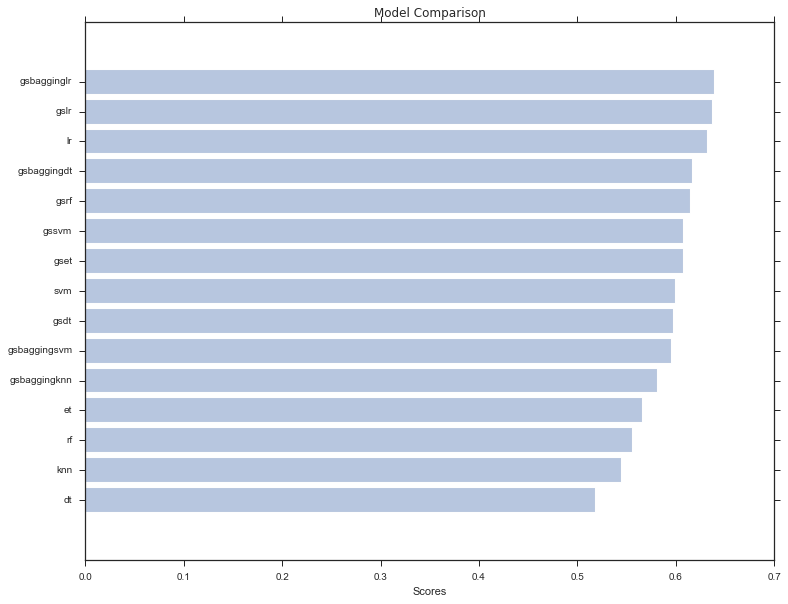

In [1170]:
scores = pd.DataFrame([(k, v['score']) for k, v in all_models.iteritems()],
             columns=['model', 'score']).set_index('model').sort_values('score', ascending=True)

models = scores.index
y_pos = np.arange(len(models))
performance = scores.score
plt.figure(figsize=[11,9])
plt.barh(y_pos, performance, align='center', alpha=0.4)
plt.yticks(y_pos, models)
plt.xlabel('Scores')
plt.title('Model Comparison')

scores

#### StratifiedKFold is a variation of k-fold which returns stratified folds: each set contains approximately the same percentage of samples of each target class as the complete set.

In [1171]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold

def retest(model):
    scores = cross_val_score(model, X, y,
                             cv=StratifiedKFold(y, shuffle=True),
                             n_jobs=-1)
    m = scores.mean()
    s = scores.std()
    
    return m, s

for k, v in all_models.iteritems():
    cvres = retest(v['model'])
    print k, 
    all_models[k]['cvres'] = cvres

knn gsbagginglr gsrf svm et gsbaggingsvm gslr rf gsbaggingdt gsdt lr gset gssvm gsbaggingknn dt


## cross_val_score std can be used as a  measure of classifier stability,  and cross_val_score Mean to measure acuracy  the idea is to select the model has the best bias-variance combination.

,score,error
model,,
dt,0.544604,0.008135
et,0.560403,0.005835
rf,0.561600,0.010047
gsbaggingknn,0.582396,0.008304
gsdt,0.589392,0.015879
knn,0.592803,0.009506
svm,0.597604,0.019189
gsbaggingsvm,0.604404,0.007468
gsbaggingdt,0.610404,0.011112


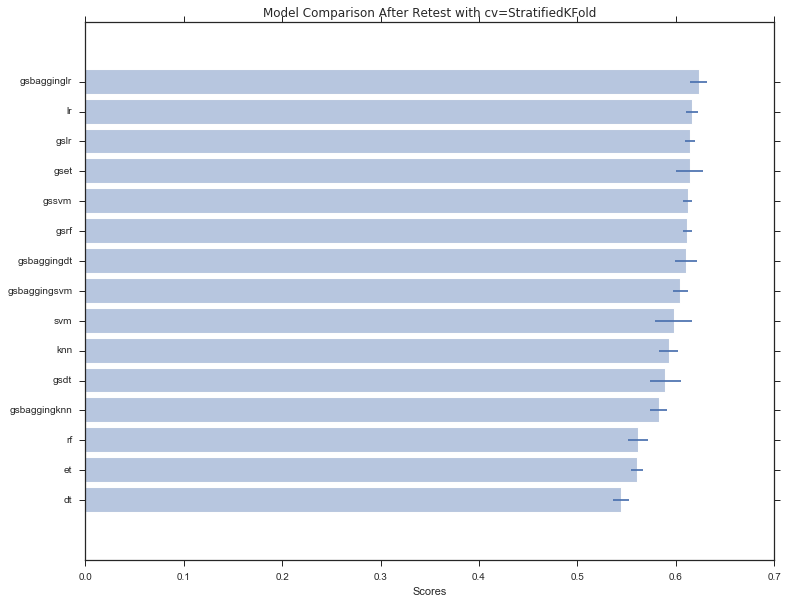

In [1172]:
cvscores = pd.DataFrame([(k, v['cvres'][0], v['cvres'][1] ) for k, v in all_models.iteritems()],
                        columns=['model', 'score', 'error']).set_index('model').sort_values('score', ascending=True)

models = cvscores.index
y_pos = np.arange(len(models))
performance = cvscores.score
error = cvscores.error
plt.figure(figsize=[11,9])
plt.barh(y_pos, performance, xerr=error, align='center', alpha=0.4)
plt.yticks(y_pos, models)
plt.xlabel('Scores')
plt.title('Model Comparison After Retest with cv=StratifiedKFold')


cvscores

In [1173]:
col_name = X_train.columns.tolist()
coef = pd.DataFrame(lr.coef_, columns=col_name).T
coef.sort_values(0, ascending = False)

,0
bmi_group_1,0.593514
race_3,0.507504
current_hrt_1,0.395586
Agemenar_0,0.287509
Agegroup_4,0.261533
Agemenar_1,0.245392
age_f_birth_4,0.212910
race_1,0.180431
menopaus_1,0.166407
age_f_birth_2,0.116625


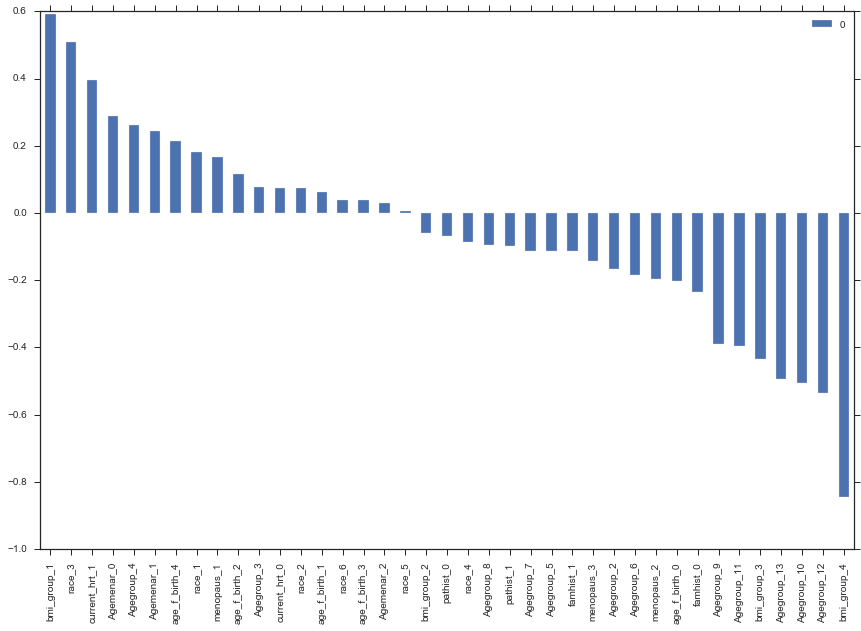

In [1174]:
coef.sort_values(0, ascending = False).plot(kind='bar', figsize=[13,9])

In [207]:
risk_data.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
0,2000,1,1,0,0,0,1,0,1,3,0,0,1,Negative,0
1,2000,1,1,0,0,1,3,0,1,2,0,0,1,Positive,1
2,2000,1,1,0,0,1,4,0,1,1,0,0,2,Positive,1
3,2000,1,1,0,0,2,3,0,1,1,0,0,1,Positive,1
4,2000,1,1,0,0,2,3,0,1,1,1,9,1,Positive,1


In [1064]:
#  try to select 5,000 random records for modeling using SQL with no 9 records 
read_tables = 'SELECT  * FROM  risk_data where birads_breast_density = 9;'
dftest = sql.read_sql(read_tables, con=connect_pos)
del dftest['index']
dftest.head()

,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
0,2000,1,1,0,0,4,9,0,1,1,0,0,1,Negative,0
1,2000,1,1,0,0,9,9,0,1,1,1,0,1,Negative,0
2,2000,1,1,0,0,9,9,1,2,1,1,0,2,Negative,0
3,2000,1,1,0,1,0,9,0,1,1,1,0,1,Negative,0
4,2000,1,1,0,1,4,9,0,1,1,0,0,1,Negative,0


In [1175]:
dftest.shape

(253767, 15)

In [1176]:
see = lr.predict_proba(X_test)

In [1177]:
see2 = lr.predict (X_test)
see2

array([0, 0, 0, ..., 0, 0, 1])

In [1068]:
X_test.head()

,Agemenar_0,Agemenar_1,Agemenar_2,Agegroup_2,Agegroup_3,Agegroup_4,Agegroup_5,Agegroup_6,Agegroup_7,Agegroup_8,...,age_f_birth_4,current_hrt_0,current_hrt_1,menopaus_1,menopaus_2,menopaus_3,bmi_group_1,bmi_group_2,bmi_group_3,bmi_group_4
2855,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1248,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3190,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2692,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2642,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [1178]:
lr.score(X_test, y_test)

0.6313333333333333

In [1192]:
list_rows = X_test.index.values.tolist()

In [1193]:
df2008_2009.iloc[list_rows].head()


,year,age_group_5_years,race_eth,first_degree_hx,age_menarche,age_first_birth,birads_breast_density,current_hrt,menopaus,bmi_group,biophx,breast_cancer_history,count,results,results_bin
2855,2005,6,1,1,2,3,2,0,9,3,0,0,0.000000,Negative,0
1248,2007,6,1,0,0,0,2,0,2,4,0,0,0.025210,Negative,0
3190,2009,13,1,0,1,0,1,0,2,9,0,0,0.005042,Negative,0
2692,2005,4,9,9,9,9,2,0,1,1,0,0,0.000000,Negative,0
2642,2006,5,1,0,0,9,1,1,2,2,0,0,0.005042,Negative,0


In [1194]:
df_comp  = df2008_2009.iloc[list_rows][[ 'birads_breast_density', 'results_bin']]

In [1195]:
df_comp ['predict'] = see2

In [1074]:
for i in range(4):
    print see2[i]

0
0
0
1


In [1183]:
df_comp.head()

,birads_breast_density,results_bin,predict
2855,2,0,0
1248,2,0,0
3190,1,0,0
2692,2,0,1
2642,1,0,1


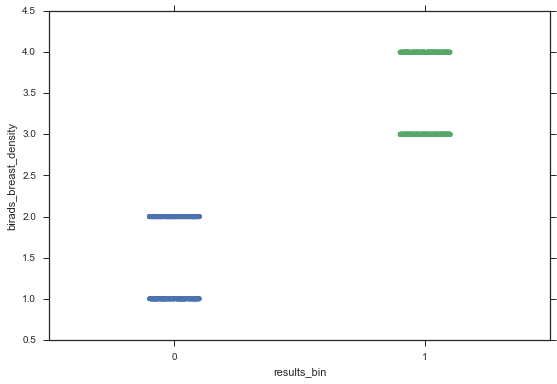

In [1184]:
sns.stripplot(x="results_bin", y="birads_breast_density", data=df_comp, jitter=True);

In [423]:
#sns.stripplot(x="predict", y="birads_breast_density", data=df_comp, jitter=True);

### Predict the results of the "unknow" part of the dataset birads_breast_density = 9

In [1079]:
dftest['year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])

In [1078]:
# scaler = MinMaxScaler(feature_range=(0, 9))
# dftest[['count']] = scaler.fit_transform(dftest[['count']])
# dff_test = get_features(df2008_2009)
# dff_test.head()

In [1080]:
#dff_test['count'] = dftest['count']

In [1185]:
dff2 = pd.get_dummies(dftest['age_menarche'], prefix='Agemenar')

dff3 = pd.get_dummies(dftest['age_group_5_years'], prefix='Agegroup')

dff4 = pd.get_dummies(dftest['race_eth'], prefix='race')

dff5 = pd.get_dummies(dftest['first_degree_hx'], prefix='famhist')

dff6 = pd.get_dummies(dftest['breast_cancer_history'], prefix='pathist')

dff7 = pd.get_dummies(dftest['age_first_birth'], prefix='age_f_birth')

dff8 = pd.get_dummies(dftest['current_hrt'], prefix='current_hrt')

dff9 = pd.get_dummies(dftest['menopaus'], prefix='menopaus')

dff10 = pd.get_dummies(dftest['bmi_group'], prefix='bmi_group')


# Drop column for UNKNOWN
del dff2['Agemenar_9']

# Drop column for group 1 this model is not suitable for this age 
del dff3['Agegroup_1']

# Drop column for UNKNOWN
del dff4['race_9']

# Drop column for UNKNOWN
del dff5['famhist_9']

# Drop column for UNKNOWN
del dff6['pathist_9']

# Drop column for UNKNOWN
del dff7['age_f_birth_9']

# Drop column for UNKNOWN
del dff8['current_hrt_9']

# Drop column for UNKNOWN
del dff9['menopaus_9']

# Drop column for UNKNOWN
del dff10['bmi_group_9']

dff_test = pd.concat([dff2,dff3,dff4,dff5,dff6,dff7,dff8,dff9,dff10], axis = 1)










In [1199]:
race_combine.columns

Index([u'birads_breast_density',              u'race_eth',
                  u'race_count',         u'birads_labels',
                 u'race_labels'],
      dtype='object')

In [1186]:
see_unknown = lr.predict (dff_test)

In [1187]:
dff_test['prediction'] = see_unknown

In [1188]:
dff_test.prediction.value_counts()

0    145717
1    108050
Name: prediction, dtype: int64

In [1189]:
p = str((dff_test.prediction.value_counts()/ len(dff_test)) * 100)
print p

0    57.421572
1    42.578428
Name: prediction, dtype: float64


In [1190]:
p = str((df2008_2009.results_bin.value_counts()/ len(df2008_2009)) * 100)
print p

0    52.4
1    47.6
Name: results_bin, dtype: float64


In [1191]:
p = str((df_comp.predict.value_counts()/ len(df_comp)) * 100)
print p

0    56.2
1    43.8
Name: predict, dtype: float64


In [1338]:
race_combine.head()

,birads_breast_density,race_eth,race_count,birads_labels,race_labels
0,1,1,79598,1- Almost entirely fat,1- Non-Hispanic white
1,1,2,9225,1- Almost entirely fat,2- Non-Hispanic black
2,1,3,6603,1- Almost entirely fat,3- Asian/Pacific Islander
3,1,4,2983,1- Almost entirely fat,4- Native American
4,1,5,20126,1- Almost entirely fat,5- Hispanic


In [1289]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import math

py.sign_in('mariapichardo', 'efxdg3vty3')

data = race_combine
slope = 2.666051223553066e-05
hover_text = []
bubble_size = []

for index, row in race_combine.iterrows():
    hover_text.append(('Birads: {birads_labels}<br>'+
                      'Race: {race_labels}<br>'+
                      'Race Count: {race_count}<br>'+
                      'birads_breast_density: {birads_breast_density}').format(birads_labels=row['birads_labels'],
                                            race_labels=row['race_labels'],
                                            race_count=row['race_count'],
                                            birads_breast_density=row['birads_breast_density']))
    bubble_size.append((row['race_count']*slope)*15)
     
race_combine['text'] = hover_text
race_combine['size'] = bubble_size


trace0 = go.Scatter(
    x=race_combine['birads_breast_density'][race_combine['birads_breast_density'] == 1],
    y=race_combine['race_count'][race_combine['birads_breast_density'] == 1],
    mode='markers',
    name='1- Almost entirely fat',
    text=race_combine['text'][race_combine['birads_breast_density'] == 1] ,
    marker=dict(
        symbol='circle',
        sizemode='diameter',
        sizeref=0.85,
        size=race_combine['size'][race_combine['birads_breast_density'] == 1],
        line=dict(
            width=2
        ),
    )
)

trace1 = go.Scatter(
    x=race_combine['birads_breast_density'][race_combine['birads_breast_density'] == 2],
    y=race_combine['race_count'][race_combine['birads_breast_density'] == 2],
    mode='markers',
    name='2- Scattered fibroglandular densities',
    text=race_combine['text'][race_combine['birads_breast_density'] == 2] ,
    marker=dict(
        symbol='circle',
        sizemode='diameter',
        sizeref=0.85,
        size=race_combine['size'][race_combine['birads_breast_density'] == 2],
        line=dict(
            width=2
        ),
    )
)

trace2 = go.Scatter(
    x=race_combine['birads_breast_density'][race_combine['birads_breast_density'] == 3],
    y=race_combine['race_count'][race_combine['birads_breast_density'] == 3],
    mode='markers',
    name='3- Heterogeneously dense',
    text=race_combine['text'][race_combine['birads_breast_density'] == 3] ,
    marker=dict(
        symbol='circle',
        sizemode='diameter',
        sizeref=0.85,
        size=race_combine['size'][race_combine['birads_breast_density'] == 3],
        line=dict(
            width=2
        ),
    )
)

trace3 = go.Scatter(
    x=race_combine['birads_breast_density'][race_combine['birads_breast_density'] == 4],
    y=race_combine['race_count'][race_combine['birads_breast_density'] == 4],
    mode='markers',
    name='4- Extremely dense',
    text=race_combine['text'][race_combine['birads_breast_density'] == 4] ,
    marker=dict(
        symbol='circle',
        sizemode='diameter',
        sizeref=0.85,
        size=race_combine['size'][race_combine['birads_breast_density'] == 4],
        line=dict(
            width=2
        ),
    )
)

trace4 = go.Scatter(
    x=race_combine['birads_breast_density'][race_combine['birads_breast_density'] == 9],
    y=race_combine['race_count'][race_combine['birads_breast_density'] == 9],
    mode='markers',
    name='9- Unknown',
    text=race_combine['text'][race_combine['birads_breast_density'] == 9] ,
    marker=dict(
        symbol='circle',
        sizemode='diameter',
        sizeref=0.85,
        size=race_combine['size'][race_combine['birads_breast_density'] == 9],
        line=dict(
            width=2
        ),
    )
)

data = [trace0, trace1, trace2, trace3, trace4]

#data = [trace1]

layout = go.Layout(
    title='Race Count by Brads',
    xaxis=dict(
        title='Brads',
        gridcolor='rgb(255, 255, 255)',
        range=[-2, 10],
        #type='log',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Race Count',
        gridcolor='rgb(255, 255, 255)',
        range=[1000, 300000],
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='race_count_by_brads')


In [1331]:
# <div>
#     <a href="https://plot.ly/~mariapichardo/282/" target="_blank" title="Race Count by Brads" style="display: block; text-align: center;"><img src="https://plot.ly/~mariapichardo/282.png" alt="Race Count by Brads" style="max-width: 100%;width: 600px;"  width="600" onerror="this.onerror=null;this.src='https://plot.ly/404.png';" /></a>
#     <script data-plotly="mariapichardo:282"  src="https://plot.ly/embed.js" async></script>
# </div>



#### Wanted to do this last bubble chart for a visual representation of the relationship between how many of each race is within the Brads classification 